# Drug Consumption Risk Project

In [456]:
# import moduls for data processing and visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
plt.style.use('tableau-colorblind10')
plt.rcParams.update({"axes.facecolor" : "white",
                     "axes.edgecolor":  "grey"})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rseed = 420

In [2]:
#import data
# data contains an ID column which will be used as Index colum as it is numerical and does not seem to provide 
#any further information
data = pd.read_excel('drug_consumption.xls', sheet_name = 'drug_consumption', header = 0, index_col = 'ID')

In [3]:
data.head(10)

Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
ID                                                                      
1   0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
2  -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
3   0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
4  -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
5   0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
6   2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   
7   1.09449 -0.48246    1.16365 -0.57009   -0.31685 -0.46725 -1.09207   
8   0.49788 -0.48246   -1.73790  0.96082   -0.31685 -1.32828  1.93886   
9   0.49788  0.48246   -0.05921  0.24923   -0.31685  0.62967  2.57309   
10  1.82213 -0.48246    1.16365  0.96082   -0.31685 -0.24649  0.00332   

     Oscore   Ascore   Cscore  Impulsive       SS Alcohol Amphet Amyl Benzos  \
ID                                                                             
1  -0.58331 -0.91699 -0.00665   -0.21712 -1.18084     CL5    CL2  CL0    CL2   
2   1.43533  0.76096 -0.14277   -0.71126 -0.21575     CL5    CL2  CL2    CL0   
3  -0.84732 -1.62090 -1.01450   -1.37983  0.40148     CL6    CL0  CL0    CL0   
4  -0.01928  0.59042  0.58489   -1.37983 -1.18084     CL4    CL0  CL0    CL3   
5  -0.45174 -0.30172  1.30612   -0.21712 -0.21575     CL4    CL1  CL1    CL0   
6  -1.55521  2.03972  1.63088   -1.37983 -1.54858     CL2    CL0  CL0    CL0   
7  -0.45174 -0.30172  0.93949   -0.21712  0.07987     CL6    CL0  CL0    CL0   
8  -0.84732 -0.30172  1.63088    0.19268 -0.52593     CL5    CL0  CL0    CL0   
9  -0.97631  0.76096  1.13407   -1.37983 -1.54858     CL4    CL0  CL0    CL0   
10 -1.42424  0.59042  0.12331   -1.37983 -0.84637     CL6    CL1  CL0    CL1   

   Caff Cannabis Choc Coke Crack Ecstasy Heroin Ketamine Legalh  LSD Meth  \
ID                                                                          
1   CL6      CL0  CL5  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   
2   CL6      CL4  CL6  CL3   CL0     CL4    CL0      CL2    CL0  CL2  CL3   
3   CL6      CL3  CL4  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   
4   CL5      CL2  CL4  CL2   CL0     CL0    CL0      CL2    CL0  CL0  CL0   
5   CL6      CL3  CL6  CL0   CL0     CL1    CL0      CL0    CL1  CL0  CL0   
6   CL6      CL0  CL4  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   
7   CL6      CL1  CL5  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   
8   CL6      CL0  CL4  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   
9   CL6      CL0  CL6  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   
10  CL6      CL1  CL6  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   

   Shrooms Nicotine Semer  VSA  
ID                              
1      CL0      CL2   CL0  CL0  
2      CL0      CL4   CL0  CL0  
3      CL1      CL0   CL0  CL0  
4      CL0      CL2   CL0  CL0  
5      CL2      CL2   CL0  CL0  
6      CL0      CL6   CL0  CL0  
7      CL0      CL6   CL0  CL0  
8      CL0      CL0   CL0  CL0  
9      CL0      CL6   CL0  CL0  
10     CL0      CL6   CL0  CL0

## Information provided at [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29)
  
Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

What do the different categories mean:  
CL0: never used.   
CL1: Used over a decade ago.   
CL2: Used in last decade.   
CL3: Used in last year.    
CL4: used in last month.   
CL5: used in last week.    
CL6: used in last day.  

## Personality traits

Five different factors are used to describe the Personality. This system is called the [OCEAN model](https://en.wikipedia.org/wiki/Big_Five_personality_traits) and was introduced in the eraly 1980s and has been developed since.  
The 5 traits are:  (from low to high) 
    * NScore: neuroticism (resilient/confident vs. sensitive/nervous)  
    * Escore: extraversion (solitary/reserved vs. outgoing/energetic)  
    * Oscore: openeness to experience (consistent/cautious vs. inventive/curious)  
    * Ascore: agreeableness (challenging/callous vs. friendly/compassionate)  
    * Cscore: conscientiousness (extravagant/careless vs. efficient/organized)  
    
Furthermore scores for "Impulsiveness" and "sensation seeing" are provided:  
    * Impulsivness based on [BIS-11 system](http://www.impulsivity.org/measurement/bis11)  
    * sensation seeking based on [IMPSS](https://grupsderecerca.uab.cat/zkpq/sites/grupsderecerca.uab.cat.zkpq/files/zkpq7.pdf)  


## Check for Missing values

In [4]:
data.isna().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

There are now missing values in the dataset.

### Check if information provided at UCI is coorect

In [5]:
print(data.shape)
data.dtypes

(1885, 31)


Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Shrooms       object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [6]:
# get number of colums with different types type
object_shape = data.select_dtypes(include = ['object']).shape
num_shape = data.select_dtypes(include = ['int64', 'float64']).shape
print(f'There are {object_shape[1]} features of type "object"')
print(f'There are {num_shape[1]} features of type "int64" or "float64"')

There are 19 features of type "object"
There are 12 features of type "int64" or "float64"


This is in line with the description of the dataset. Note that the numerical features like 'Gender' and all personality trait scores are still categorial values that have been transformed using T-statistics t = (sample mean - population mean)/(st_dev sample/sqrt(number of samples)).  


In [7]:
#get the number of different values in categorial colums

for col in data.select_dtypes(include = ['object']).columns:
    print(f' Number of unique values for {col:10}: {data[col].nunique()}')
    

 Number of unique values for Alcohol   : 7
 Number of unique values for Amphet    : 7
 Number of unique values for Amyl      : 7
 Number of unique values for Benzos    : 7
 Number of unique values for Caff      : 7
 Number of unique values for Cannabis  : 7
 Number of unique values for Choc      : 7
 Number of unique values for Coke      : 7
 Number of unique values for Crack     : 7
 Number of unique values for Ecstasy   : 7
 Number of unique values for Heroin    : 7
 Number of unique values for Ketamine  : 7
 Number of unique values for Legalh    : 7
 Number of unique values for LSD       : 7
 Number of unique values for Meth      : 7
 Number of unique values for Shrooms   : 7
 Number of unique values for Nicotine  : 7
 Number of unique values for Semer     : 5
 Number of unique values for VSA       : 7


In [8]:
# what are the Semeron values and how many people calim to have used it?
data['Semer'].value_counts(normalize = False).sort_index()

CL0    1877
CL1       2
CL2       3
CL3       2
CL4       1
Name: Semer, dtype: int64

Less than 0.5 % of the responders claim to have used the fictious drug Semeron and can thus be expected to be over-claimers.

In [9]:
# look at data of Semeron over claimers
data[data['Semer'] != 'CL0'].round(2)

Age  Gender  Education  Country  Ethnicity  Nscore  Escore  Oscore  \
ID                                                                          
730  -0.08    0.48      -1.74    -0.10      -0.32   -0.58    0.32    0.14   
821  -0.95   -0.48      -0.61    -0.10      -0.50   -0.68    1.74    0.72   
1520 -0.95   -0.48      -0.61    -0.57      -0.32   -0.25   -0.81   -1.28   
1537 -0.95    0.48      -0.61    -0.57       0.11   -0.47    0.81    0.29   
1702  0.50    0.48       0.45    -0.57      -0.32    1.98   -0.81    2.15   
1773 -0.95   -0.48      -1.23    -0.57      -0.22   -0.35    1.29    1.06   
1810 -0.95    0.48      -1.44    -0.57      -0.32    1.23    1.11    1.06   
1827 -0.95    0.48       0.45    -0.57      -0.32    0.22   -0.30    0.88   

      Ascore  Cscore  Impulsive    SS Alcohol Amphet Amyl Benzos Caff  \
ID                                                                      
730    -0.61    0.12       1.29  0.77     CL6    CL2  CL2    CL2  CL6   
821     0.13    0.42       0.88  1.92     CL3    CL0  CL0    CL0  CL6   
1520   -1.34   -1.92      -0.71  0.08     CL0    CL2  CL3    CL2  CL3   
1537    2.04    1.81      -1.38 -0.22     CL5    CL6  CL0    CL4  CL6   
1702    0.76   -0.01       1.29  1.92     CL6    CL0  CL0    CL3  CL5   
1773   -0.02   -0.53       0.53  1.22     CL4    CL3  CL0    CL3  CL6   
1810   -1.48    0.12       0.88  1.92     CL4    CL3  CL0    CL2  CL6   
1827    1.29   -0.01       0.88  0.08     CL4    CL0  CL0    CL2  CL5   

     Cannabis Choc Coke Crack Ecstasy Heroin Ketamine Legalh  LSD Meth  \
ID                                                                       
730       CL6  CL5  CL2   CL2     CL2    CL2      CL2    CL0  CL4  CL2   
821       CL4  CL5  CL0   CL0     CL3    CL0      CL0    CL0  CL5  CL0   
1520      CL4  CL1  CL3   CL2     CL1    CL2      CL1    CL2  CL1  CL2   
1537      CL3  CL6  CL4   CL0     CL4    CL0      CL4    CL3  CL2  CL0   
1702      CL6  CL4  CL2   CL0     CL2    CL0      CL2    CL2  CL2  CL0   
1773      CL6  CL6  CL0   CL0     CL3    CL0      CL4    CL3  CL6  CL3   
1810      CL6  CL3  CL5   CL2     CL4    CL2      CL1    CL4  CL1  CL0   
1827      CL6  CL5  CL2   CL0     CL0    CL0      CL0    CL2  CL3  CL0   

     Shrooms Nicotine Semer  VSA  
ID                                
730      CL6      CL6   CL2  CL2  
821      CL5      CL4   CL3  CL0  
1520     CL4      CL2   CL3  CL1  
1537     CL3      CL4   CL4  CL3  
1702     CL2      CL6   CL2  CL0  
1773     CL3      CL3   CL1  CL3  
1810     CL1      CL6   CL1  CL2  
1827     CL3      CL5   CL2  CL0

It appears that people who claim to have used Semmeron are not taking many illegal drgus regularly. Nevertheless, we will omit these responders. 

In [10]:
# remove Semeron over-claimers
data_mod = data.copy()
data_mod = data_mod[data_mod['Semer'] == 'CL0']
data_mod.drop('Semer', axis = 1, inplace = True)

## Is the data set biased?

## Gender

In [11]:
data['Gender'].unique()

array([ 0.48246, -0.48246])

In [12]:
# make a new dataframe for replacing data
data_mod2 = data_mod.copy()
data_mod2.replace({'Gender':{data['Gender'].unique()[0]:'female',data['Gender'].unique()[1]:'male'}}, inplace = True)

data_mod2.head(2)

Age  Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
ID                                                                              
1   0.49788  female   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
2  -0.07854    male    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   

     Ascore   Cscore  Impulsive       SS Alcohol Amphet Amyl Benzos Caff  \
ID                                                                         
1  -0.91699 -0.00665   -0.21712 -1.18084     CL5    CL2  CL0    CL2  CL6   
2   0.76096 -0.14277   -0.71126 -0.21575     CL5    CL2  CL2    CL0  CL6   

   Cannabis Choc Coke Crack Ecstasy Heroin Ketamine Legalh  LSD Meth Shrooms  \
ID                                                                             
1       CL0  CL5  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0     CL0   
2       CL4  CL6  CL3   CL0     CL4    CL0      CL2    CL0  CL2  CL3     CL0   

   Nicotine  VSA  
ID                
1       CL2  CL0  
2       CL4  CL0

In [13]:
fig = px.pie(data_mod2, names = 'Gender', title = 'Distribution of gender')
fig.update_traces(textposition='inside', textinfo='percent+label')

Data set contains balanced gender data.

### How does the gender affect the drug consumption risk?

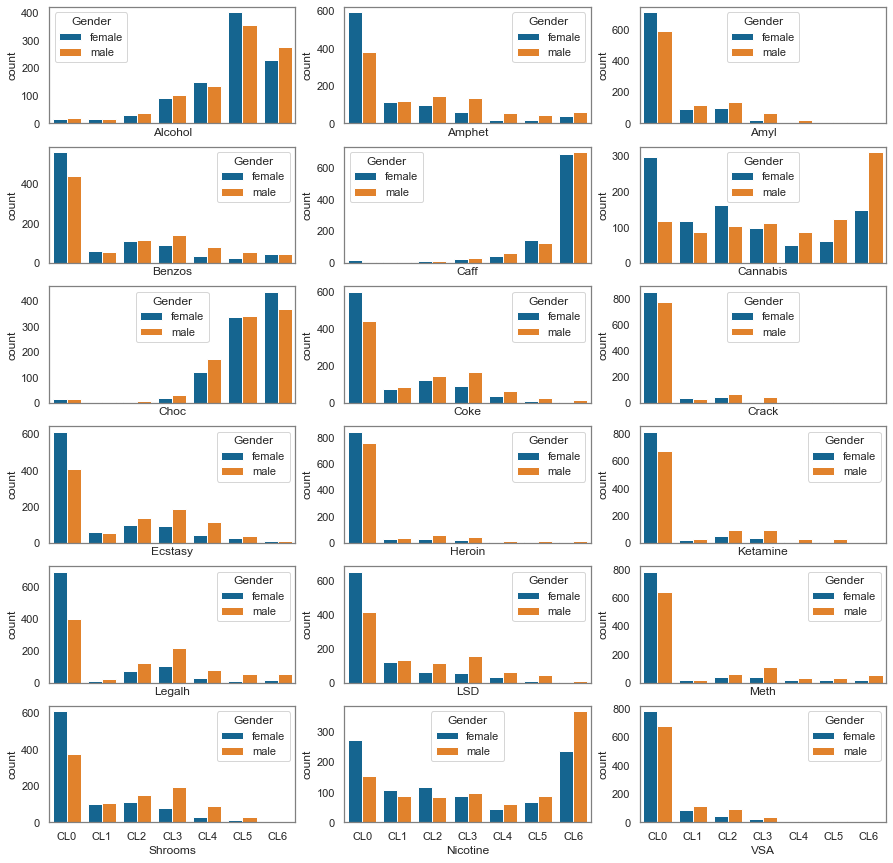

In [1009]:
#get a list with name of drugs
drugs = [name for name in data.select_dtypes(include = ['object']).columns if name not in ['Semer']]
#order categories
order = data_mod2.Alcohol.value_counts().sort_index()

fig, axs = plt.subplots(6,3, sharex= True)
fig.set_figheight(15)
fig.set_figwidth(15)
j = 0
for i, drug in enumerate(drugs):
    if i % 3 == 0:
        j = 0
    sns.countplot(data = data_mod2, x = drug, hue = 'Gender', order = order.index, ax = axs[i//3, j] )
    j += 1


Most drugs have more often never been used by females than by men (category CL0) and more men have used drugs recently (CL6).  Illelag drugs are more frequently consumed by men.

### Age

In [1010]:
data['Age'].unique()

array([ 0.49788, -0.07854, -0.95197,  2.59171,  1.09449,  1.82213])

In [1011]:
data_mod2.replace({'Age':{data['Age'].unique()[0]:'35-44',data['Age'].unique()[1]:'25-34',
                 data['Age'].unique()[2]: '18-24', data['Age'].unique()[3]:'65+',
                 data['Age'].unique()[4]: '45-54', data['Age'].unique()[5]:'55-64'}}, inplace = True)

In [1012]:
fig = px.pie(data_mod2, names = 'Age', title = 'Distribution of age')
fig.update_traces(textposition= 'inside', textinfo = 'percent+label',
                  marker = dict(line = dict(color='black', width= 1)))


The data has a clear bias for younger uses.

Text(0.5, 1.0, 'Distribution of gender in age groups')

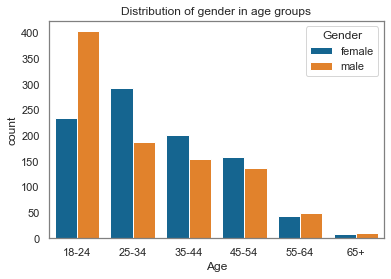

In [1013]:
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
sns.countplot(x = 'Age', hue = 'Gender', data = data_mod2, order = age_order)
plt.title('Distribution of gender in age groups')

Espacially amongst the youngest responders, the age of responders is uneven/skewed between the two genders.  

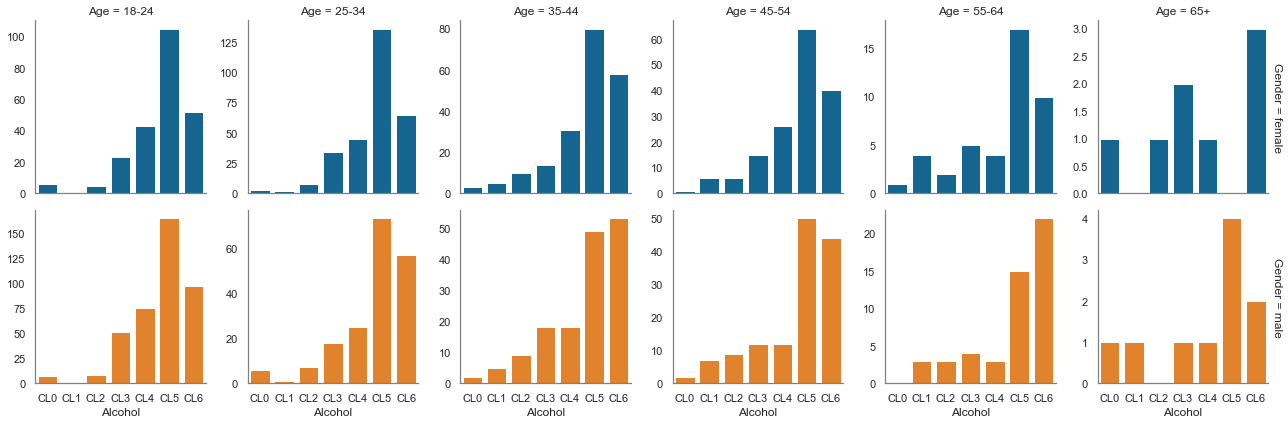

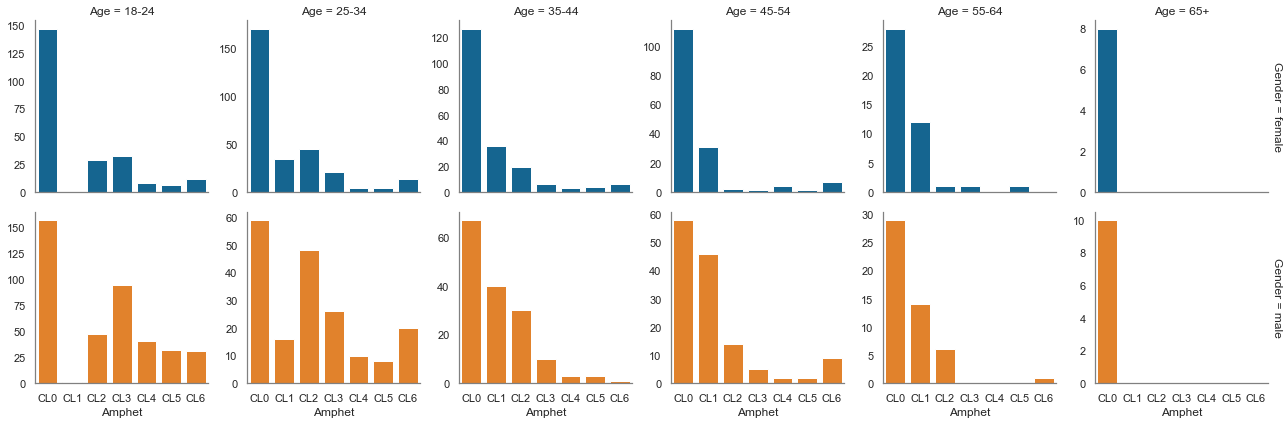

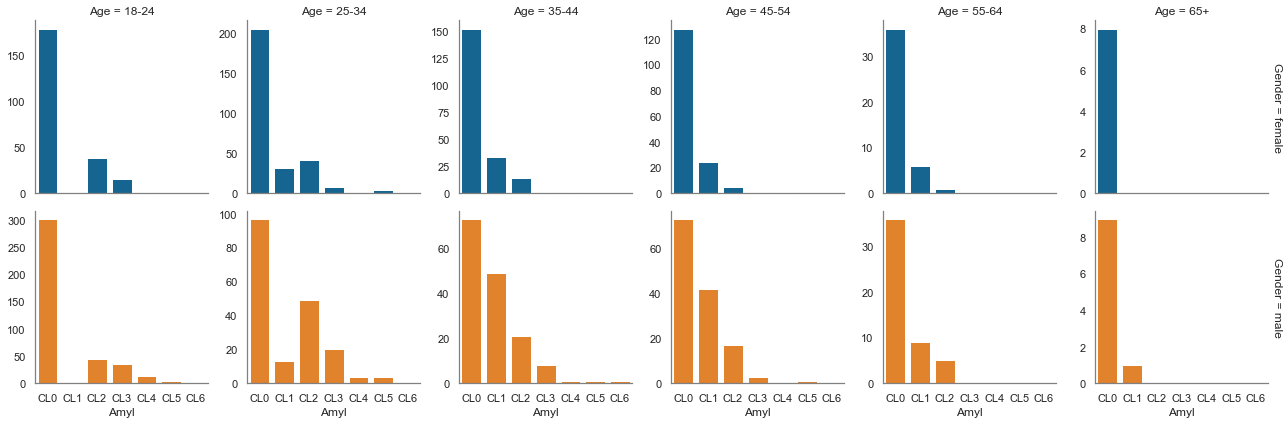

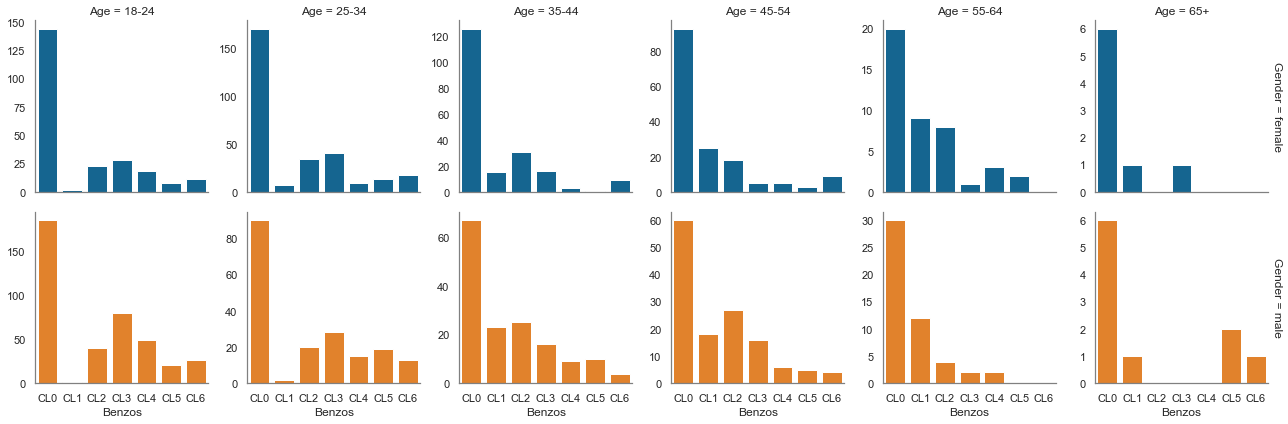

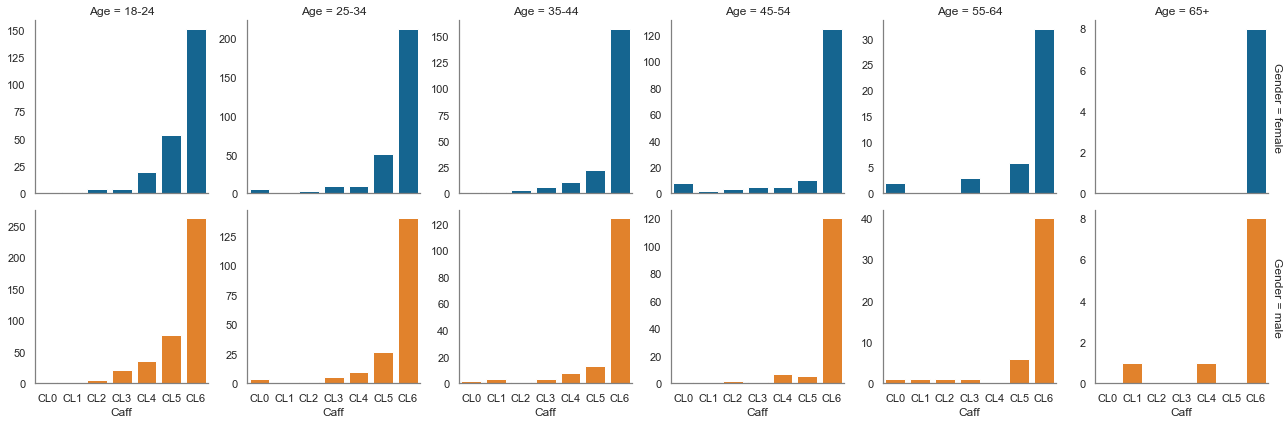

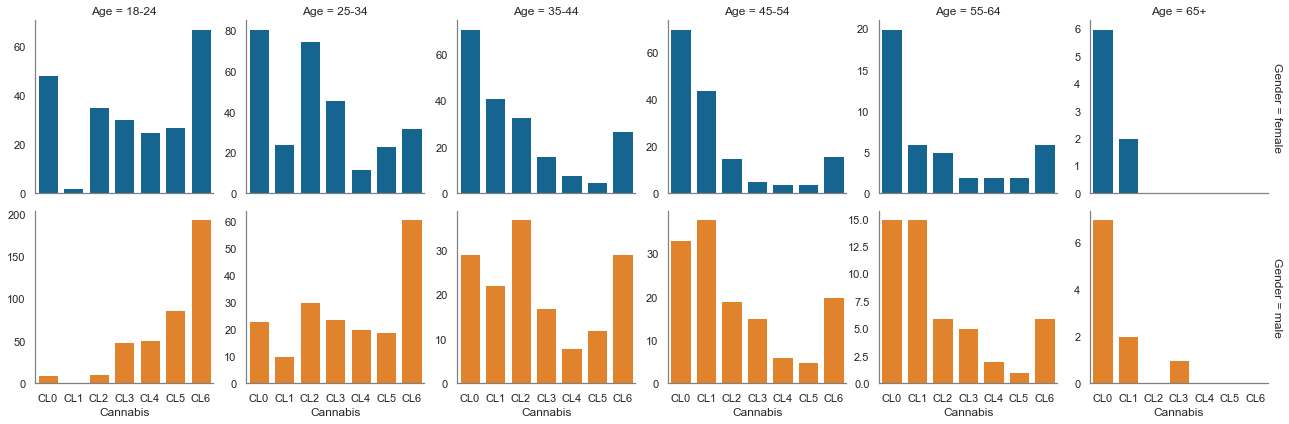

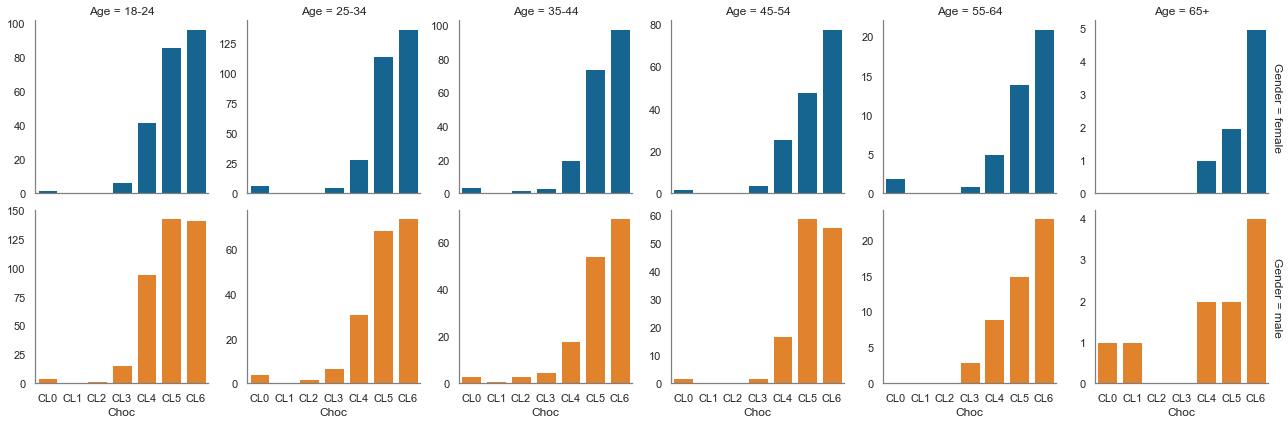

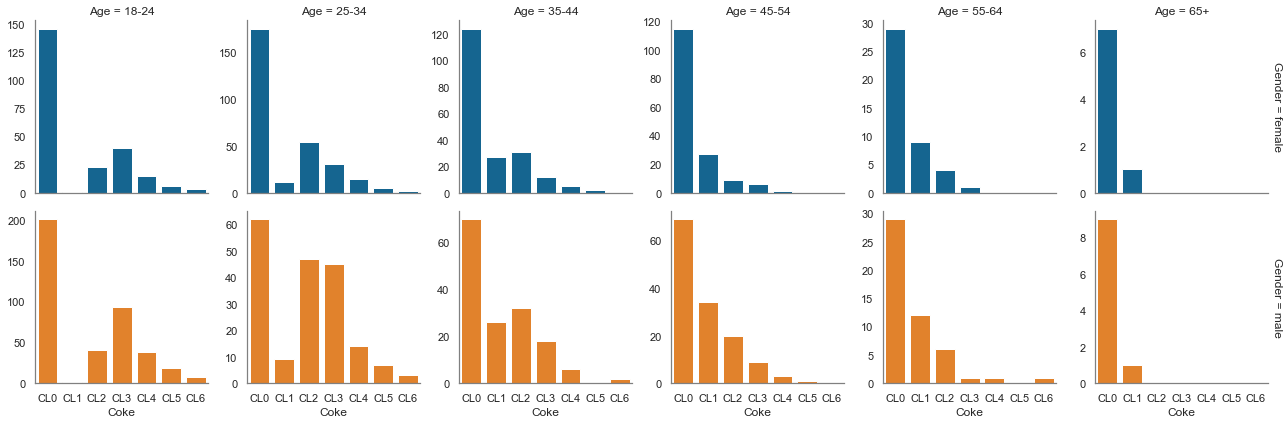

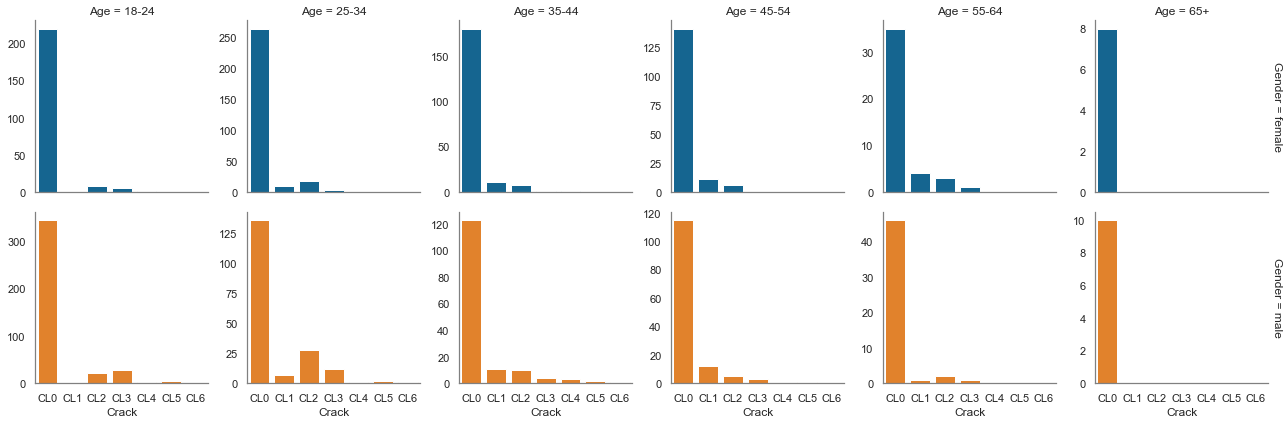

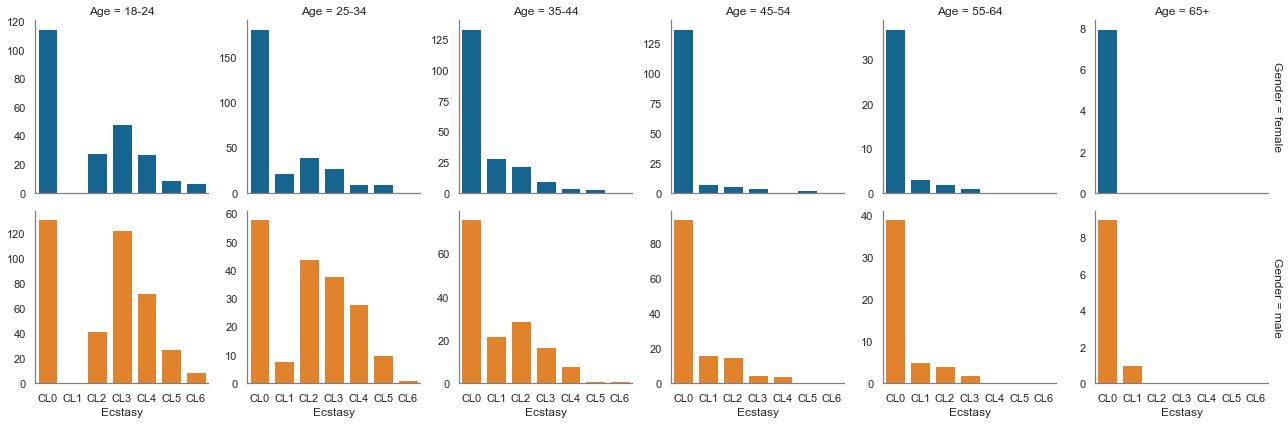

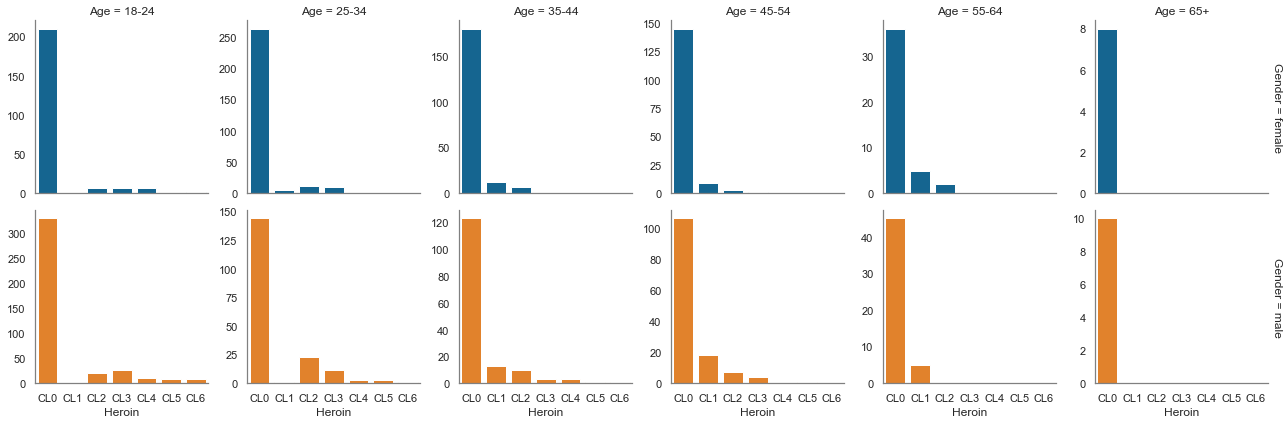

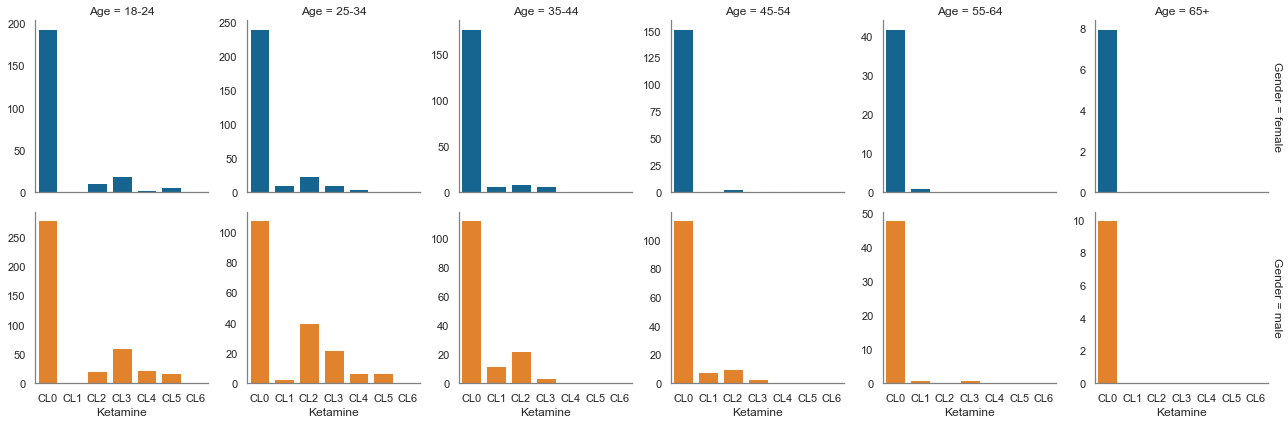

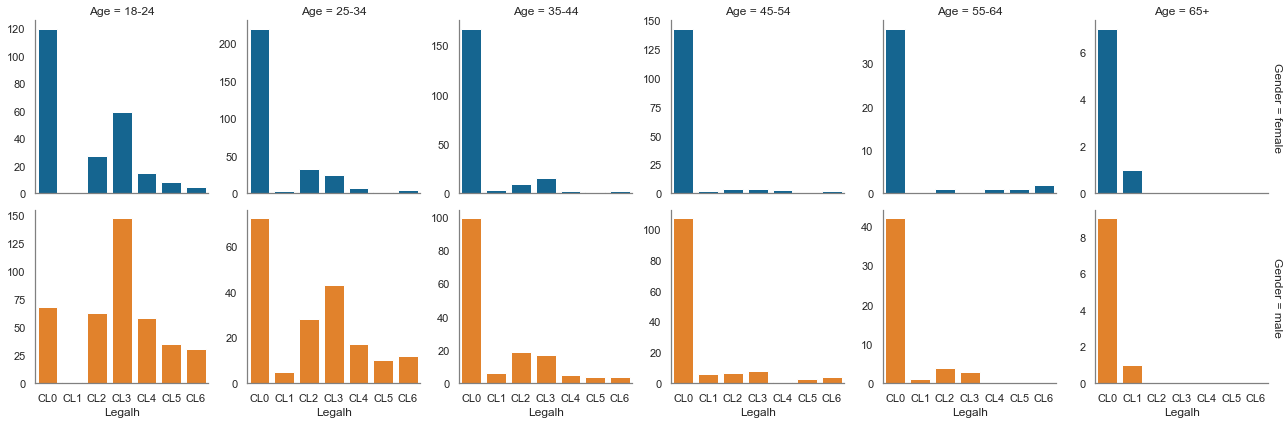

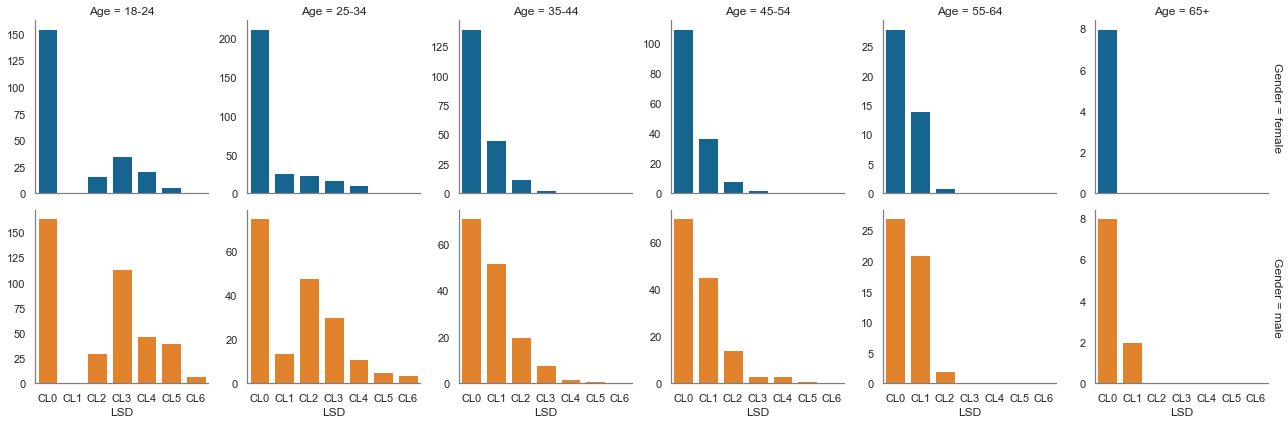

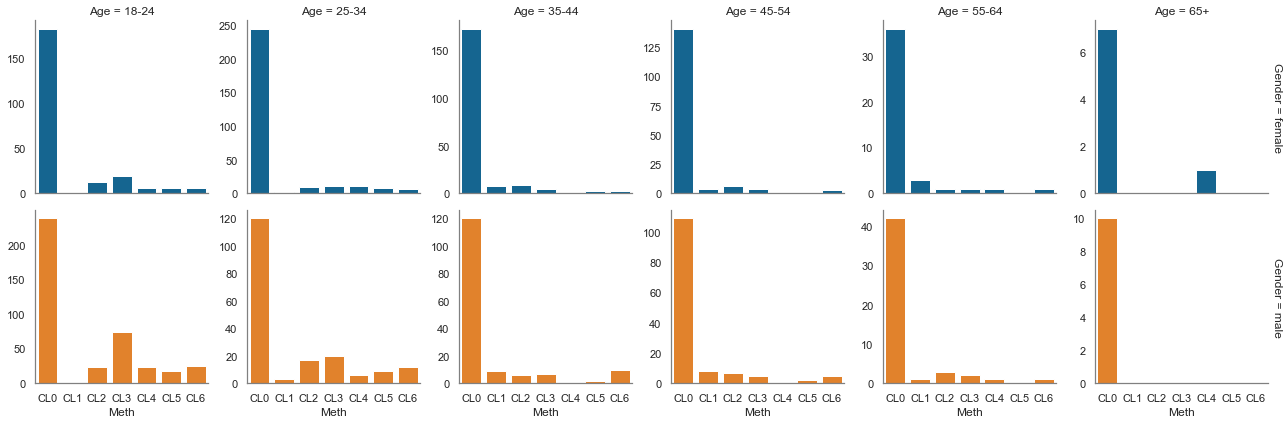

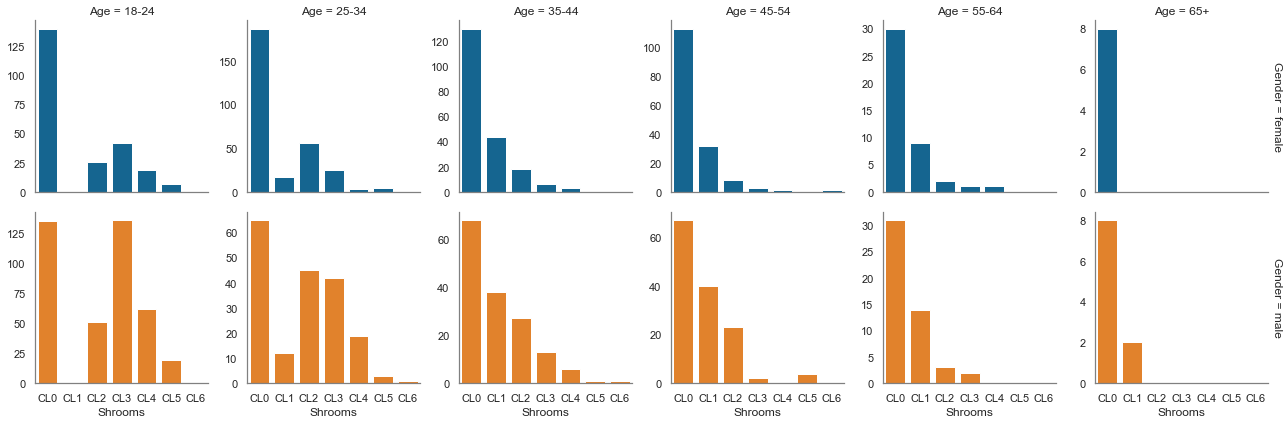

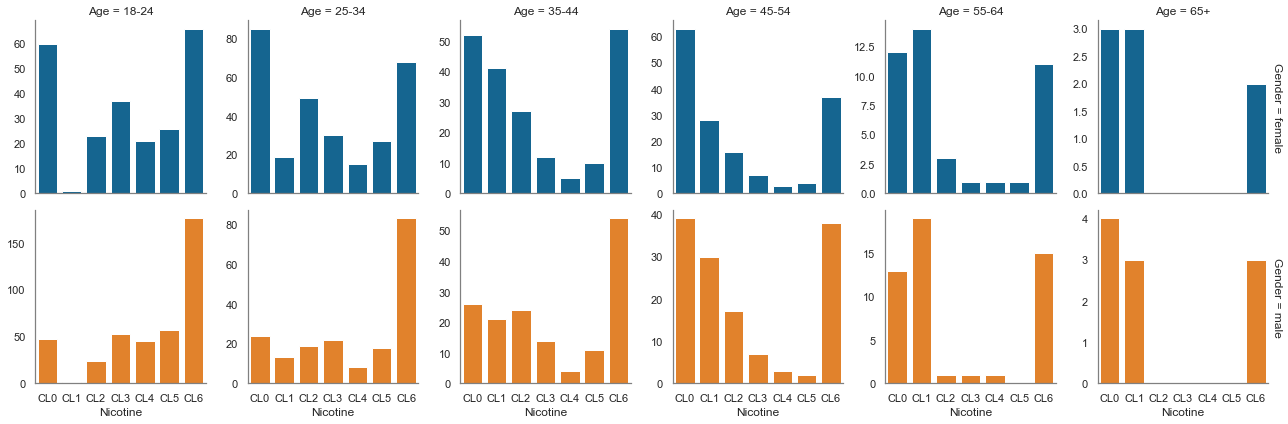

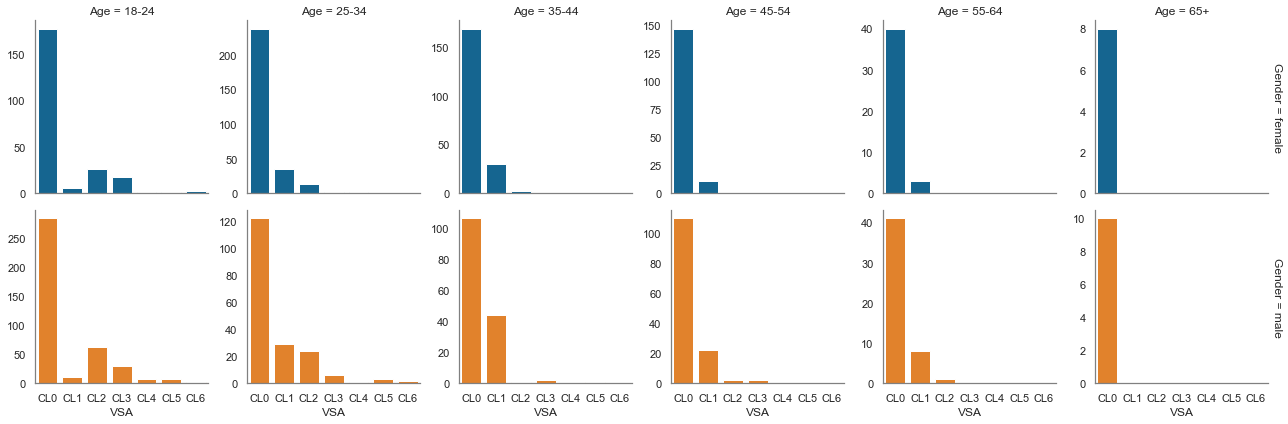

In [1017]:
# check for Gender differences for drug use by age group
# order by age and by frequency of drug use

for drug in drugs:
    p = sns.FacetGrid(data_mod2, col = 'Age', row = 'Gender', hue = 'Gender', 
                      sharey = False, col_order = age_order,margin_titles = True)
    p.map(sns.countplot, drug, order = order.index)
   

Throughout all age groups most people consumed Alcohol, Caffeine or Chocolate recently irespective of the gender.
Nicotine is also commenly used by all responders.  

Almost all illigal drugs have never been consumed by most responders. Younger responders generally have a higher tendency of using these drugs. However, one should keep in mind, that more young people than old people responded. But amongst the older participants, more people than not stated that they have never in there life used these drugs.
  
In general it looks like men are more open to experience with drugs.

### Education

In [20]:
data_mod['Education'].unique()

array([-0.05921,  1.98437,  1.16365, -1.22751, -1.7379 ,  0.45468,
       -0.61113, -2.43591, -1.43719])

In [21]:
data_mod2.replace({'Education':{data['Education'].unique()[0]:'prof certificate/diploma',data['Education'].unique()[1]:'doctorate',
                 data['Education'].unique()[2]: 'Master', data['Education'].unique()[3]:'left school at 18',
                 data['Education'].unique()[4]: 'left school at 16', data['Education'].unique()[5]:'University degree',
                 data['Education'].unique()[6]:'uni wo degree', data['Education'].unique()[7]:'left school < 16',
                 data['Education'].unique()[8]:'left school at 17'}}, inplace = True)

In [22]:
px.pie(data_mod2, names = 'Education').update_traces(textposition= 'inside', textinfo = 'percent+label',
                  marker = dict(line = dict(color='black', width= 1)))

Most responders went to University but did not graduate or have at least a University degree (Bachelor?).

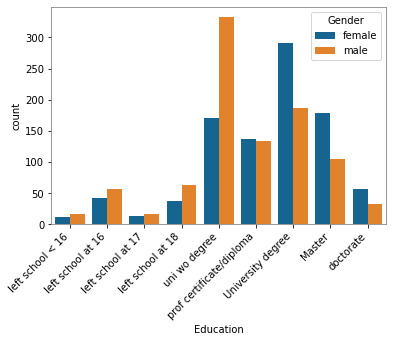

In [23]:
p = sns.countplot(x = 'Education', hue = 'Gender', data = data_mod2,
              order = ['left school < 16','left school at 16','left school at 17','left school at 18','uni wo degree',
                       'prof certificate/diploma','University degree', 'Master', 'doctorate'])
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right');


In [431]:
# get dataframes based on education
data_education = data_mod2.copy()
data_education.replace(['CL0', 'CL1','CL2', 'CL3', 'CL4', 'CL5', 'CL6'], 
                       ['never used', 'never used', 'used', 'used', 'used', 'weekly user','weekly user'], 
                       inplace = True)
college_dropout = data_education[data_education['Education'] == 'uni wo degree']
prof_certificate = data_education[data_education['Education'] == 'prof certificate/diploma']
master = data_education[data_education['Education'] == 'Master']


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.1, 'Number of cannabis consumers by education')

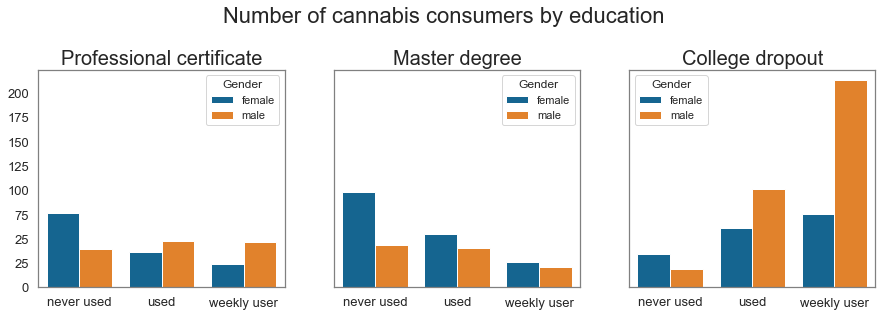

In [493]:
# plot canabis use based on education
order = ['never used', 'used', 'weekly user']
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, sharey = True)
fig.set_figwidth(15)

sns.countplot(data=prof_certificate, x = 'Cannabis', hue = 'Gender',order = order,  ax = ax0)
ax0.set_title('Professional certificate', fontsize = 20)
ax0.set_xticklabels(labels = order,fontsize = 13)
ax0.set_xlabel('')
ax0.set_yticklabels([0,25,25,75,100,125,150,175,200], fontsize = 13)
ax0.set_ylabel('')
sns.countplot(data=master, x = 'Cannabis', order = order, hue = 'Gender', ax = ax1)
ax1.set_title('Master degree', fontsize = 20)
ax1.set_xticklabels(labels = order,fontsize = 13)
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.countplot(data=college_dropout, x = 'Cannabis', order = order, hue = 'Gender',hue_order = ['female', 'male'], ax = ax2)
ax2.set_title('College dropout', fontsize = 20)
ax2.set_xticklabels(labels = order,fontsize = 13)
ax2.set_xlabel('')
ax2.set_ylabel('')

fig.suptitle('Number of cannabis consumers by education', fontsize = 22, y = 1.1)


In [428]:
college_dropout.head(5)

Age  Gender      Education Country Ethnicity   Nscore   Escore   Oscore  \
ID                                                                              
12  45-54    male  uni wo degree   Other     White -1.32828  0.00332  0.14143   
17  35-44  female  uni wo degree      UK     White -1.55078 -0.80615 -1.68062   
26  45-54    male  uni wo degree      UK     White -0.79151 -0.43999 -1.27553   
47  45-54  female  uni wo degree  Canada     White  0.31287  0.63779 -1.11902   
57  35-44  female  uni wo degree      UK     White  0.04257  0.00332 -1.68062   

     Ascore   Cscore  Impulsive       SS      Alcohol      Amphet        Amyl  \
ID                                                                              
12 -1.92595 -0.52745    0.52975  1.22470  weekly user  never used  never used   
17  0.28783  0.75830   -0.21712 -2.07848  weekly user  never used  never used   
26  0.94156 -0.00665   -0.21712  0.40148  weekly user  never used        used   
47  0.28783  1.46191   -0.71126 -0.84637         used  never used  never used   
57 -0.01729  0.25953   -1.37983 -1.54858  weekly user  never used  never used   

        Benzos         Caff    Cannabis         Choc        Coke       Crack  \
ID                                                                             
12  never used  weekly user        used  weekly user        used  never used   
17  never used  weekly user        used  weekly user  never used  never used   
26  never used  weekly user  never used  weekly user        used  never used   
47  never used  weekly user  never used         used  never used  never used   
57  never used  weekly user  never used  weekly user  never used  never used   

       Ecstasy      Heroin    Ketamine      Legalh         LSD        Meth  \
ID                                                                           
12        used  never used  never used  never used  never used  never used   
17  never used  never used  never used  never used  never used  never used   
26        used  never used  never used        used        used  never used   
47  never used  never used  never used  never used  never used  never used   
57  never used  never used  never used  never used  never used  never used   

       Shrooms     Nicotine         VSA  
ID                                       
12        used  weekly user  never used  
17  never used  weekly user  never used  
26        used   never used  never used  
47  never used         used  never used  
57  never used   never used  never used

### Country

In [24]:
data_mod.Country.unique()

array([ 0.96082,  0.24923, -0.57009, -0.28519, -0.09765,  0.21128,
       -0.46841])

In [25]:
data_mod2.replace({'Country':{data['Country'].unique()[0]:'UK',data['Country'].unique()[1]:'Canada',
                 data['Country'].unique()[2]: 'USA', data['Country'].unique()[3]:'Other',
                 data['Country'].unique()[4]: 'Australia', data['Country'].unique()[5]:'Rep of Ireland',
                 data['Country'].unique()[6]:'New Zealand'}}, inplace = True)

In [26]:
px.pie(data_mod2, names = 'Country', title = 'Country of residence').update_traces(
                  textposition= 'inside', textinfo = 'percent+label',
                  marker = dict(line = dict(color='black', width= 1)))

Most responders have their current residence in the UK. 

### Ethnicity

In [27]:
data_mod.Ethnicity.unique()

array([ 0.126  , -0.31685,  0.1144 , -0.22166, -0.50212, -1.10702,
        1.90725])

In [28]:
data_mod2.replace({'Ethnicity':{data['Ethnicity'].unique()[0]:'White/Asian',data['Ethnicity'].unique()[1]:'White',
                 data['Ethnicity'].unique()[2]: 'other', data['Ethnicity'].unique()[3]:'White/Black',
                 data['Ethnicity'].unique()[4]: 'Asian', data['Ethnicity'].unique()[5]:'Black',
                 data['Ethnicity'].unique()[6]:'Black/Asian'}}, inplace = True)

In [29]:
px.pie(data_mod2, names = 'Ethnicity', title = 'Distribution of Ethnicity').update_traces(
                  textposition= 'inside', textinfo = 'percent+label',
                  marker = dict(line = dict(color='black', width= 1)))

Almost all responders are white. Needs to be checked whether the residencence is a usefull feature for prediction.

In [30]:
data_mod_eth = data_mod2.copy()
#convert categorial values for drugs to numerical values 
data_mod_eth.replace(to_replace=['CL0', 'CL1','CL2', 'CL3', 'CL4', 'CL5', 'CL6'], value=[0,1,2,3,4,5,6], inplace=True)
#calculate the mean as an estimate of average usage
eth_group = pd.pivot_table(data_mod_eth, index = 'Ethnicity' )
eth_group[drugs].round(2)


Alcohol  Amphet  Amyl  Benzos  Caff  Cannabis  Choc  Coke  Crack  \
Ethnicity                                                                       
Asian           2.68    0.64  0.20    0.92  4.88      0.96  4.80  0.40   0.12   
Black           4.00    0.27  0.00    0.45  4.36      1.30  4.70  0.48   0.18   
Black/Asian     4.33    0.00  0.00    3.00  5.33      5.33  6.00  1.00   0.00   
White           4.68    1.34  0.62    1.45  5.52      3.00  5.13  1.15   0.29   
White/Asian     4.90    1.90  0.20    2.40  5.65      3.65  4.45  1.80   0.60   
White/Black     4.95    1.58  0.79    1.74  5.37      2.63  5.21  1.32   0.47   
other           4.47    1.98  0.71    2.21  5.37      3.85  4.94  1.68   0.47   

             Ecstasy  Heroin  Ketamine  Legalh   LSD  Meth  Shrooms  Nicotine  \
Ethnicity                                                                       
Asian           0.68    0.16      0.28    0.36  0.40  0.04     0.44      2.00   
Black           0.36    0.12      0.18    0.64  0.12  0.15     0.27      1.76   
Black/Asian     0.33    0.00      0.00    1.67  3.33  1.00     2.67      3.33   
White           1.32    0.37      0.57    1.36  1.05  0.83     1.18      3.22   
White/Asian     1.55    0.95      0.60    1.25  1.50  1.55     1.70      3.30   
White/Black     1.11    0.63      0.53    1.68  0.84  1.00     0.89      3.68   
other           1.81    0.50      0.66    2.00  1.58  0.97     1.63      3.68   

              VSA  
Ethnicity          
Asian        0.56  
Black        0.03  
Black/Asian  1.33  
White        0.42  
White/Asian  0.70  
White/Black  0.42  
other        0.68

Without considering numbers, just by looking at the means:  
"Asians" drink slightly less than whites.    
"Others" take Amphet more often.  
"Black/Asian" have the highest tendency to take Benzos.  
"Asians" and "Blacks" consume less cannabis.  
"Asians" and "Blacks" use less cocaine less frequently than others.  
"Black/Asian" and "Blacks" consume less ecstasy.   
"Other" uses lagal highs more often than other ethnicities.  
"Black/Asians" have a much higher tendency to use LSD.   
"Asian" and "Black" hardly ever use meth.  
"Black/Asian" consume more shrooms than others.  
"Blacks" have the lowest tendency to smoke.

In [31]:
eth_group = pd.pivot_table(data_mod_eth, index = 'Ethnicity', aggfunc = 'max'  )
eth_group[drugs]

Alcohol  Amphet  Amyl  Benzos  Caff  Cannabis  Choc  Coke  Crack  \
Ethnicity                                                                       
Asian              6       6     2       6     6         6     6     4      1   
Black              6       5     0       4     6         6     6     5      6   
Black/Asian        5       0     0       6     6         6     6     3      0   
White              6       6     6       6     6         6     6     6      6   
White/Asian        6       5     2       6     6         6     6     6      3   
White/Black        6       6     5       6     6         6     6     6      4   
other              6       6     5       6     6         6     6     6      3   

             Ecstasy  Heroin  Ketamine  Legalh  LSD  Meth  Shrooms  Nicotine  \
Ethnicity                                                                      
Asian              5       2         3       2    5     1        4         6   
Black              4       4         3       6    3     5        4         6   
Black/Asian        1       0         0       5    5     3        4         6   
White              6       6         6       6    6     6        6         6   
White/Asian        5       5         3       3    4     6        5         6   
White/Black        4       5         5       6    6     6        3         6   
other              5       5         5       6    6     6        6         6   

             VSA  
Ethnicity         
Asian          4  
Black          1  
Black/Asian    4  
White          6  
White/Asian    3  
White/Black    4  
other          6

Problem with low number count of some ethnicities:  
Not a single user of 'Amphetamines' among Black/Asian.  
No Amyl nitrite users among Blacks and Black/Asians.  
No Crack users among Black/Asians (and Asians if we consider CL1 as never used).  
Black/Asian responders have only used ecstasy more than a decade ago. 
  
All drugs with a max score of 1 for a given ethnicity means that the drug has not been used by this group in the last decade and is thus considered as non user.

<AxesSubplot:>

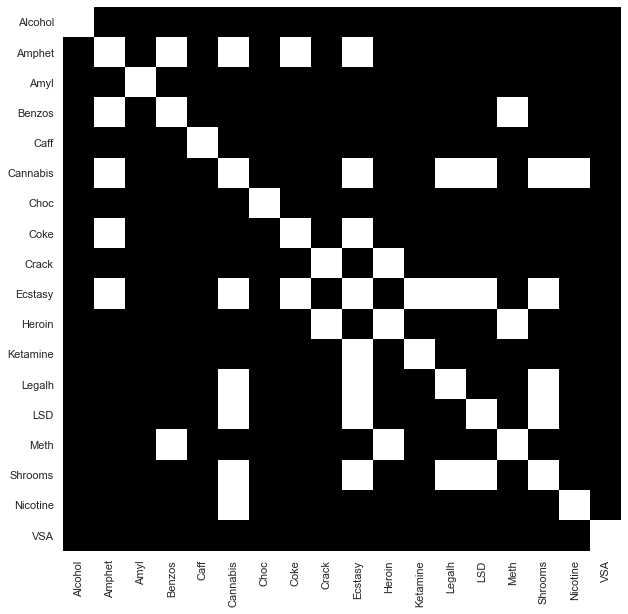

In [1038]:
# look for correlation of drug use
plt.figure(figsize = (10,10))
# plot white 
sns.heatmap(data_mod_eth[drugs].corr(method = 'spearman')>0.5, cmap = 'cubehelix', cbar = False)

This looks interesting and clearly use of some drugs is correlated. Of note, legal drugs are not associated with use of illegal drugs in this dataset, except for nicotine and cannabis (when using the chosen cut off). A correlation is evident for Heroin, Crack and Methadone. Amphetamine use correlates with use of ecstasy, cocaine, cannabis, benzos.

# What are personality traits associated with drug use?

In total the data set contains 7 differnet categories for each drug spanning different periods of usage ranging from never used to used last day. What frequency of consume qualifiers for an addicition might differ from drug to drug. For the sake of simplification we  catagorize an "active drug user" as someone who has used a given drug in the last month or more often.
    
active user: CL4, CL5, CL6   

In [33]:
# make a list of personality traits 
traits = [col for col in data.columns if 'score' in col] + ['SS', 'Impulsive']

In [34]:
# we label active users as responders who have consumed drugs at least last month
# from now on use the dataset in which only the Semeron users have been removed
user_criterion = ['CL4', 'CL5', 'CL6']

# create a heroin user dataframe
heroin_user = data_mod[data_mod['Heroin'].isin(user_criterion)]

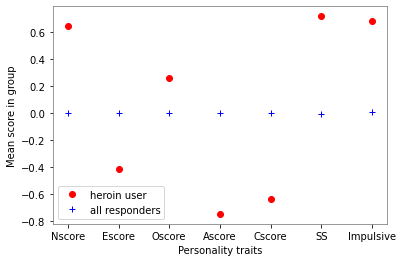

In [35]:
# calculate the main personality trait scores of Heroin users
b = heroin_user[traits].mean()
# calculate the main personality trait scores of all responders
c = data_mod[traits].mean()
# plot mean personality metric scores 
plt.plot(traits, b, 'ro', label = 'heroin user')
plt.plot(traits, c, 'b+', label ='all responders')
plt.xlabel('Personality traits')
plt.ylabel('Mean score in group')
plt.legend()


In [37]:
# get mean score for all personality scores after filtering for active users
# and get number of active users for each drug
active_user = []
active_user_mean = {}
for drug in drugs:
    # filter out active users for each drug
    user = data_mod[data_mod[drug].isin(user_criterion)]
    # add drug and number of active users in active_user list
    active_user.append((drug, user.shape[0]))
    #fill dictionary with drug name (key) and mean scores of personaliyt traits for the given drug
    active_user_mean[drug] = user[traits].mean()

# sort list of active_users according to number of users
active_user.sort(key = lambda x: x[1])


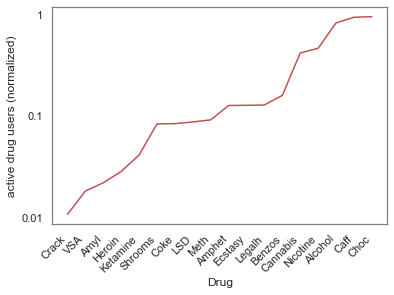

In [1037]:
# plot normalized numbers of active users
active_drug = [drug for drug, number in active_user]
active_drug_count = [number/data_mod.shape[0] for drug, number in active_user]
plt.plot(active_drug, active_drug_count, 'r-')
plt.yscale('log')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.yticks(ticks=[1,0.1, 0.01], labels=[1,0.1,0.01])
plt.xlabel('Drug')
plt.ylabel('active drug users (normalized)')
plt.show()

Chocolate, caffeine, alcohol are the most consumed drugs. That is expected as these are the legal drugs. Canabis is the most used illegal drug. 

### How many illelag drugs are people taking at a time

In [39]:
# create a list with illegal drugs
illegal_drugs = [drug for drug in drugs if drug not in ['Alcohol', 'Choc', 'Caff']]
legal_drugs = [drug for drug in drugs if drug not in illegal_drugs]

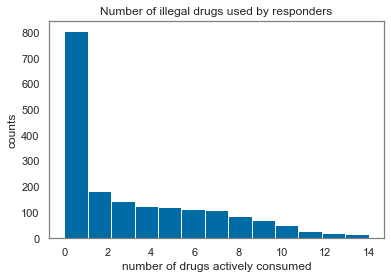

In [1039]:
data_mod22 = data_mod2.copy()
data_mod22.replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], [0,0,0,1,1,1,1], inplace = True)
# drop traits
data_mod22.drop(traits + ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'], axis = 1, inplace = True)
#drop legal_drugs
data_mod22.drop(legal_drugs, axis = 1, inplace = True)
# count number of illegal drugs responders are consuming 
data_mod22['illegal_drugs_used'] = data_mod22.sum(axis = 1)
plt.figure()
data_mod22['illegal_drugs_used'].hist(bins = 13)
plt.xlabel('number of drugs actively consumed')
plt.ylabel('counts')
plt.title('Number of illegal drugs used by responders')
plt.grid(False)

In [ ]:
As seen 

### Do personality traits differ for different drug users?

In [41]:
active_drug_mean_scores = [active_user_mean[drug] for drug in active_drug]

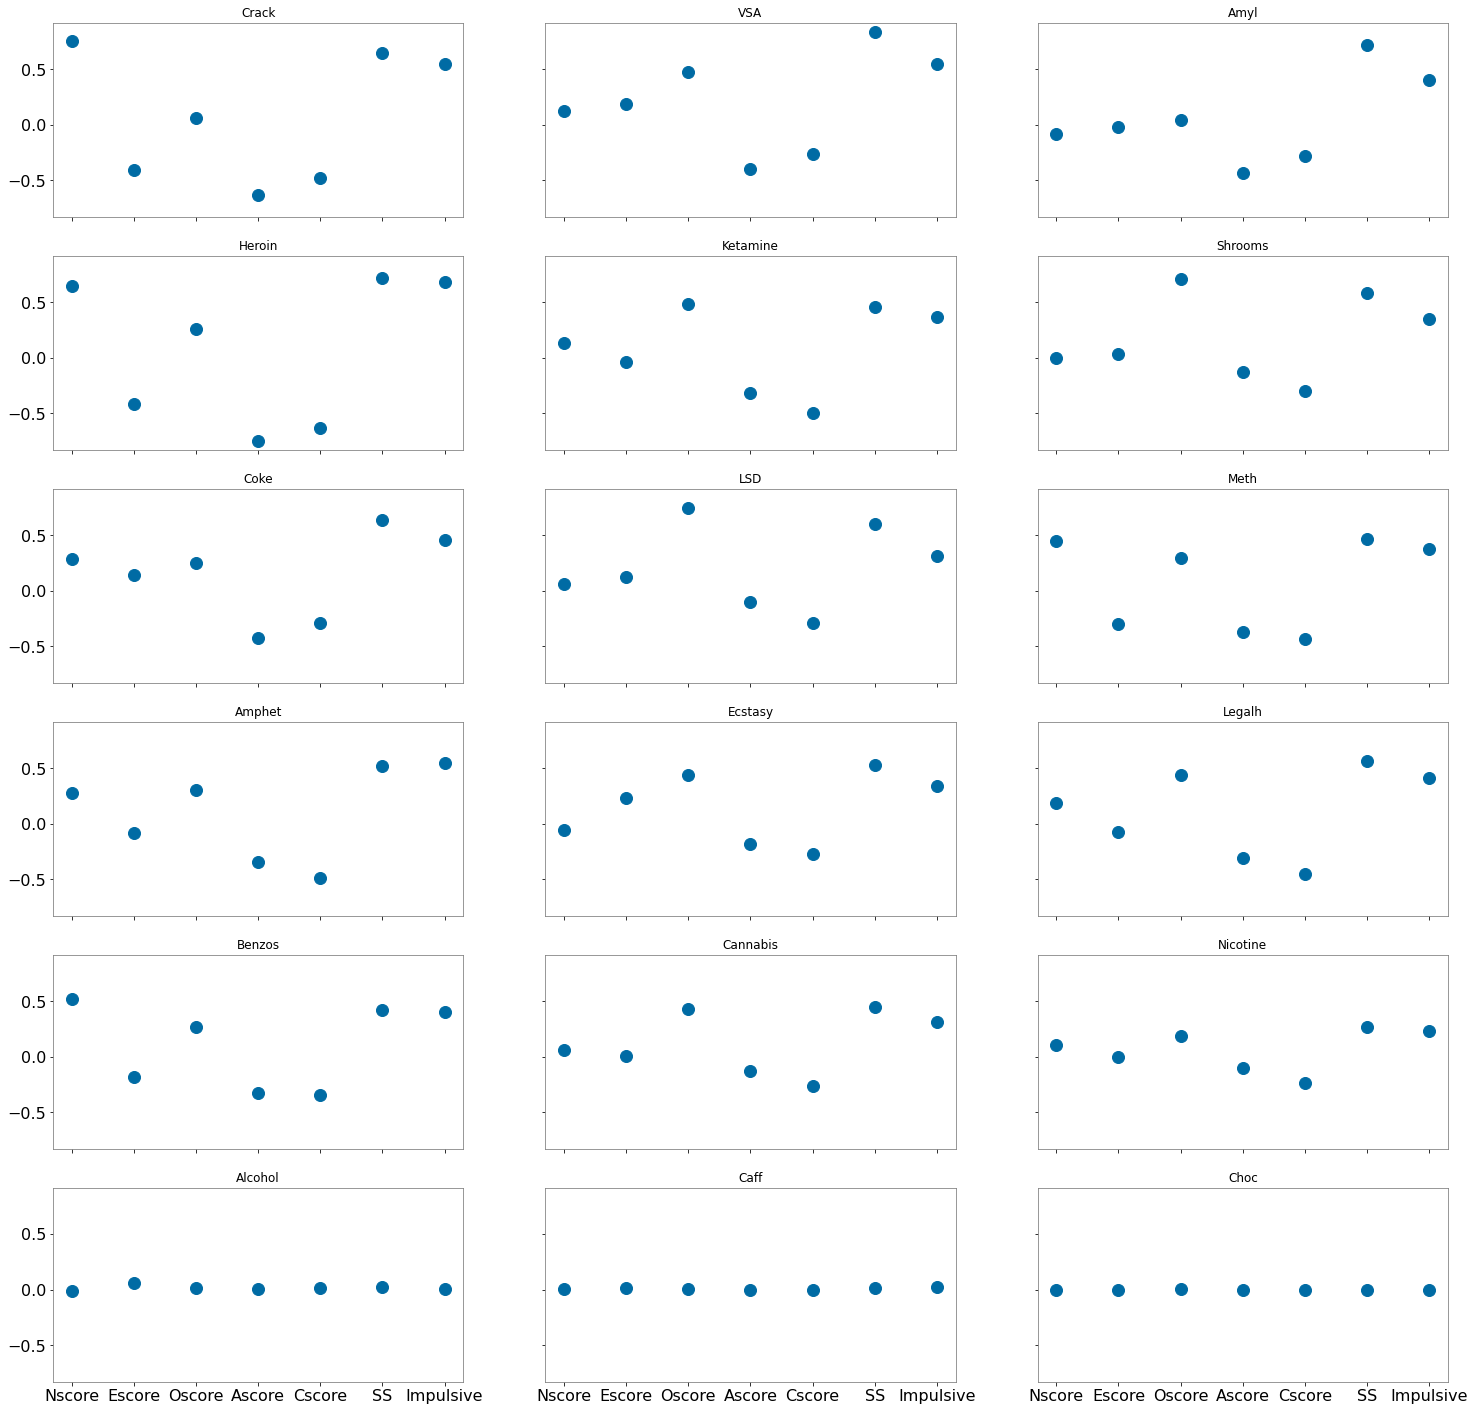

In [42]:
fig, axs = plt.subplots(6,3, sharex = True, sharey = True)
fig.set_figheight(25)
fig.set_figwidth(25)

j = 0
for i, drug in enumerate(active_drug):
    if j % 3 == 0:
        j = 0
        
    axs[i//3, j].plot(traits, active_user_mean[drug], 'o', markersize = 12 )
    axs[i//3, j].set_title(f'{drug}')
    axs[i//3, j].tick_params(axis = 'both', labelsize = 16 )
    j+=1

Personality traits of consumers of legal drugs don't differ from the sample mean while consumers of illegal drugs clearly have differetn personality traits. Moreover, there seem to be reoccuring patterns for some drugs (Heroin, crack) or (Ecstasy, LSD, Ketamine, shrooms). This might be exploided for clustering of drugs to generate bigger user groups.

In [43]:
# can we increase numbers of active drug users by groupging data, e.g. combining some drugs?
# some drugs are used by different groups and during different occasions
# Ecstasy and LSD are party drugs
# Heroin, Crack, Methadon are quite bad drugs that are only used by very few peoply

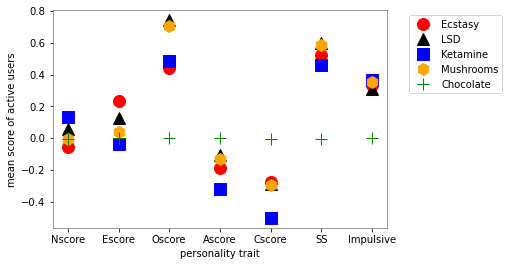

In [44]:
# Do LSD and Ecstasy consumers have similar personalities?
plt.plot(traits, active_user_mean['Ecstasy'], 'o', color = 'red', markersize = 12, label = 'Ecstasy')
plt.plot(traits, active_user_mean['LSD'], '^', color = 'black', markersize = 12, label = 'LSD')
plt.plot(traits, active_user_mean['Ketamine'], 's', color = 'blue', markersize = 12, label = 'Ketamine')
plt.plot(traits, active_user_mean['Shrooms'], 'h', color = 'orange', markersize = 12, label = 'Mushrooms')
plt.plot(traits, active_user_mean['Choc'], '+', color = 'green', markersize = 12, label = 'Chocolate')
plt.xlabel('personality trait')
plt.ylabel('mean score of active users')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

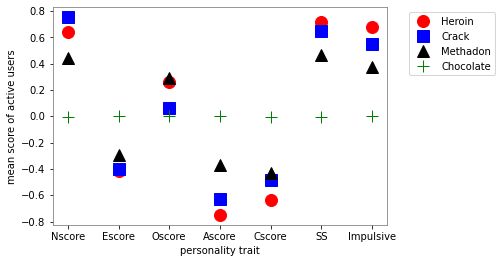

In [45]:
#Crack, Heroin and Methadon users
plt.plot(traits, active_user_mean['Heroin'], 'o', color = 'red', markersize = 12, label = 'Heroin')
plt.plot(traits, active_user_mean['Crack'], 's', color = 'blue', markersize = 12, label = 'Crack')
plt.plot(traits, active_user_mean['Meth'], '^', color = 'black', markersize = 12, label = 'Methadon')
plt.plot(traits, active_user_mean['Choc'], '+', color = 'green', markersize = 12, label = 'Chocolate')
plt.xlabel('personality trait')
plt.ylabel('mean score of active users')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

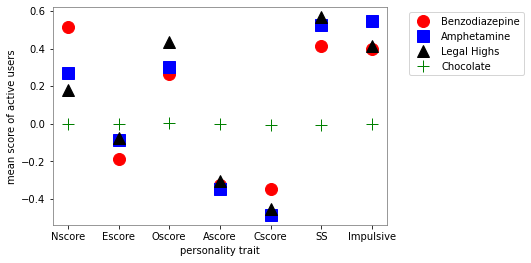

In [46]:
#Benzos, Legalh, Amphetamine consumers
plt.plot(traits, active_user_mean['Benzos'], 'o', color = 'red', markersize = 12, label = 'Benzodiazepine')
plt.plot(traits, active_user_mean['Amphet'], 's', color = 'blue', markersize = 12, label = 'Amphetamine')
plt.plot(traits, active_user_mean['Legalh'], '^', color = 'black', markersize = 12, label = 'Legal Highs')
plt.plot(traits, active_user_mean['Choc'], '+', color = 'green', markersize = 12, label = 'Chocolate')
plt.xlabel('personality trait')
plt.ylabel('mean score of active users')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

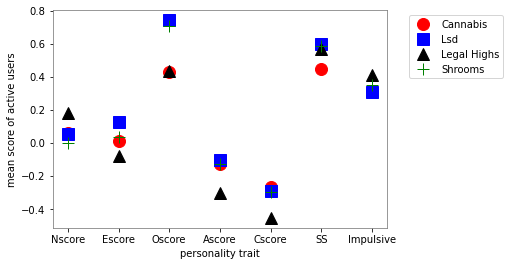

In [47]:
#Cannabis, LSD, Shrooms consumers
plt.plot(traits, active_user_mean['Cannabis'], 'o', color = 'red', markersize = 12, label = 'Cannabis')
plt.plot(traits, active_user_mean['LSD'], 's', color = 'blue', markersize = 12, label = 'Lsd')
plt.plot(traits, active_user_mean['Legalh'], '^', color = 'black', markersize = 12, label = 'Legal Highs')
plt.plot(traits, active_user_mean['Shrooms'], '+', color = 'green', markersize = 12, label = 'Shrooms')
plt.xlabel('personality trait')
plt.ylabel('mean score of active users')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Based on these results we will group some drugs together to get bigger numbers of users.

### Grouping drugs

Canabis group: Cannabis, shrooms, Lsd  
Ecstasy group: Ecstasy, Ketamine, Amphetamine, Cokaine  
Heroin group: Heroin, Meth, Crack, Benzos 

In [48]:
# get a new copy of the data set and safe it inder data_grouping
data_grouping = data_mod2.copy()

#make lists of drug groups for easier adjustment
can_group = ['Cannabis','LSD', 'Shrooms']
ecstasy_group = ['Ecstasy', 'Ketamine', 'Amphet', 'Coke']
heroin_group = ['Heroin', 'Meth', 'Crack', 'Benzos']

#we define illegal drug users we want to address as people who have consumed illigal drugs in the past month
data_grouping.replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],[0,0,0,0,1,1,1], inplace = True )

# make a drug group user  dataframes
#data_can, data_party, data_meth = data_grouping.copy(), data_grouping.copy(), data_grouping.copy() 
#data_can.drop([drug for drug in drugs if drug not in ['Cannabis', 'LSD', 'Shrooms', 'Legalh']], axis = 1, inplace = True)

data_grouping['can_used_num'] = data_grouping[can_group].sum(axis =1)
data_grouping['can_user_binary'] = data_grouping['can_used_num'].apply(lambda x: 1 if x > 0 else 0)

data_grouping['ecstasy_used_num'] = data_grouping[ecstasy_group].sum(axis =1)
data_grouping['ecstasy_user_binary'] = data_grouping['ecstasy_used_num'].apply(lambda x: 1 if x > 0 else 0)

data_grouping['heroin_used_num'] = data_grouping[heroin_group].sum(axis =1)
data_grouping['heroin_user_binary'] = data_grouping['heroin_used_num'].apply(lambda x: 1 if x > 0 else 0)

In [49]:
data_grouping.head()

Age  Gender                 Education Country    Ethnicity   Nscore  \
ID                                                                          
1   35-44  female  prof certificate/diploma      UK  White/Asian  0.31287   
2   25-34    male                 doctorate      UK        White -0.67825   
3   35-44    male  prof certificate/diploma      UK        White -0.46725   
4   18-24  female                    Master      UK        White -0.14882   
5   35-44  female                 doctorate      UK        White  0.73545   

     Escore   Oscore   Ascore   Cscore  Impulsive       SS  Alcohol  Amphet  \
ID                                                                            
1  -0.57545 -0.58331 -0.91699 -0.00665   -0.21712 -1.18084        1       0   
2   1.93886  1.43533  0.76096 -0.14277   -0.71126 -0.21575        1       0   
3   0.80523 -0.84732 -1.62090 -1.01450   -1.37983  0.40148        1       0   
4  -0.80615 -0.01928  0.59042  0.58489   -1.37983 -1.18084        1       0   
5  -1.63340 -0.45174 -0.30172  1.30612   -0.21712 -0.21575        1       0   

    Amyl  Benzos  Caff  Cannabis  Choc  Coke  Crack  Ecstasy  Heroin  \
ID                                                                     
1      0       0     1         0     1     0      0        0       0   
2      0       0     1         1     1     0      0        1       0   
3      0       0     1         0     1     0      0        0       0   
4      0       0     1         0     1     0      0        0       0   
5      0       0     1         0     1     0      0        0       0   

    Ketamine  Legalh  LSD  Meth  Shrooms  Nicotine  VSA  can_used_num  \
ID                                                                      
1          0       0    0     0        0         0    0             0   
2          0       0    0     0        0         1    0             1   
3          0       0    0     0        0         0    0             0   
4          0       0    0     0        0         0    0             0   
5          0       0    0     0        0         0    0             0   

    can_user_binary  ecstasy_used_num  ecstasy_user_binary  heroin_used_num  \
ID                                                                            
1                 0                 0                    0                0   
2                 1                 1                    1                0   
3                 0                 0                    0                0   
4                 0                 0                    0                0   
5                 0                 0                    0                0   

    heroin_user_binary  
ID                      
1                    0  
2                    0  
3                    0  
4                    0  
5                    0

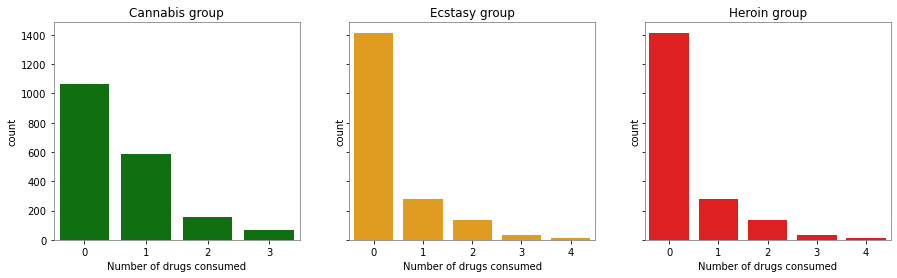

In [50]:
fig, (ax0,ax1,ax2) = plt.subplots(ncols = 3, sharey = True)
fig.set_figwidth(15)

sns.countplot(data = data_grouping, x = 'can_used_num', color = 'green', ax = ax0)
ax0.set_xlabel('Number of drugs consumed')
ax0.set_title('Cannabis group')

sns.countplot(data = data_grouping, x = 'ecstasy_used_num', color = 'orange', ax = ax1)
ax1.set_xlabel('Number of drugs consumed')
ax1.set_title('Ecstasy group')

sns.countplot(data = data_grouping, x = 'ecstasy_used_num', color = 'red', ax = ax2)
ax2.set_xlabel('Number of drugs consumed')
ax2.set_title('Heroin group')

plt.show();

In [51]:
# make a pivot table that shows the percentage of drug users in the Age groups for all clusters
age_pivot = pd.pivot_table(data = data_grouping, index = 'Age', 
                           values = ['can_user_binary', 'ecstasy_user_binary', 'heroin_user_binary'] )

#fig, (ax0,ax1,ax2) = plt.subplots(ncols = 3, sharey = True)
#fig.set_figwidth(15)
age_pivot.round(2)

can_user_binary  ecstasy_user_binary  heroin_user_binary
Age                                                            
18-24             0.74                 0.42                0.28
25-34             0.36                 0.25                0.23
35-44             0.26                 0.11                0.13
45-54             0.19                 0.10                0.12
55-64             0.20                 0.04                0.10
65+               0.00                 0.00                0.22

Text(0.5, 1.05, '% of responders having consumed drugs \n')

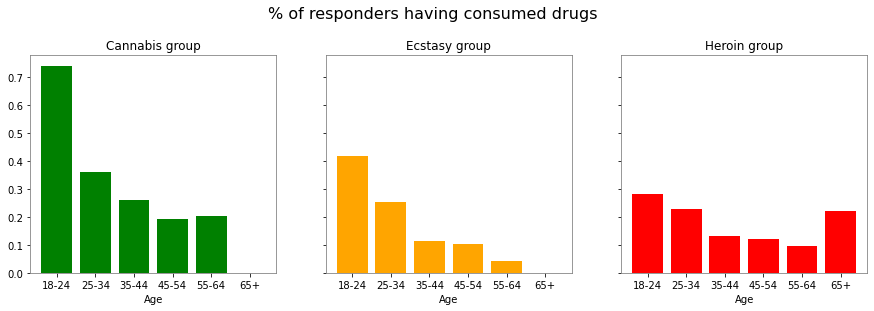

In [52]:
#fig, ax = plt.subplots()
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, sharey = True)
fig.set_figwidth(15)


ax0.bar(age_pivot.index, age_pivot.can_user_binary.values, color = 'green')
ax0.set_xlabel('Age')
ax0.set_title('Cannabis group')
ax0.set
ax1.bar(age_pivot.index, age_pivot.ecstasy_user_binary.values, color = 'orange')
ax1.set_xlabel('Age')
ax1.set_title('Ecstasy group')
ax2.bar(age_pivot.index, age_pivot.heroin_user_binary.values, color = 'red')
ax2.set_xlabel('Age')
ax2.set_title('Heroin group')

fig.suptitle('% of responders having consumed drugs \n', fontsize=16, y = 1.05)


In [53]:
# plot mean personality traits for each group

user_group = ['can_user_binary', 'ecstasy_user_binary', 'heroin_user_binary']

group_mean_scores = {}

for group in user_group:
    group_user = data_grouping[data_grouping[group] == 1]
    group_mean_scores[group] = group_user[traits].mean()
        

In [54]:
group_score_df = pd.DataFrame(index = user_group,
                             data = [group_mean_scores[user_group[0]], group_mean_scores[user_group[1]], group_mean_scores[user_group[2]]]
                                     )
group_score_df


Nscore    Escore    Oscore    Ascore    Cscore  \
can_user_binary      0.063182 -0.001171  0.430786 -0.132711 -0.270561   
ecstasy_user_binary  0.128121  0.046808  0.369079 -0.271240 -0.370136   
heroin_user_binary   0.456856 -0.203879  0.287832 -0.307308 -0.332104   

                           SS  Impulsive  
can_user_binary      0.446086   0.306893  
ecstasy_user_binary  0.528360   0.425445  
heroin_user_binary   0.425206   0.378674

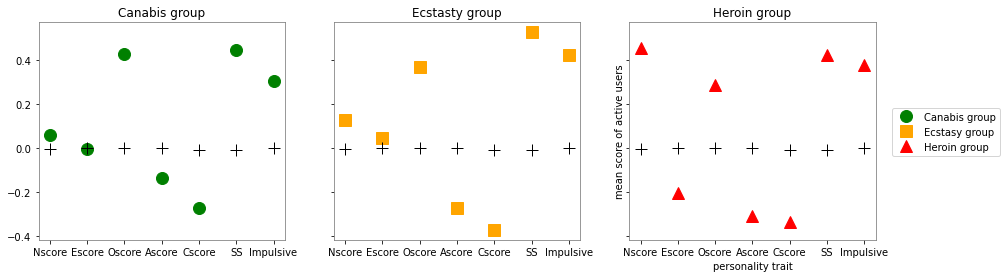

In [55]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, sharey = True)
fig.set_figwidth(15)

ax0.plot(traits, group_mean_scores['can_user_binary'], 'o', color = 'green', markersize = 12, label = 'Canabis group')
ax0.plot(traits, active_user_mean['Choc'], '+', color = 'black', markersize = 12, label = 'Chocolate')
ax0.set_title('Canabis group')

ax1.plot(traits, group_mean_scores['ecstasy_user_binary'], 's', color = 'orange', markersize = 12, label = 'Ecstasy group')
ax1.plot(traits, active_user_mean['Choc'], '+', color = 'black', markersize = 12, label = 'Chocolate')
ax1.set_title('Ecstasty group')

ax2.plot(traits, group_mean_scores['heroin_user_binary'], '^', color = 'red', markersize = 12, label = 'Heroin group')
ax2.plot(traits, active_user_mean['Choc'], '+', color = 'black', markersize = 12, label = 'Chocolate')
ax2.set_title('Heroin group')

plt.xlabel('personality trait')
plt.ylabel('mean score of active users')

# get handles and labels for the legend
lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    
fig.legend(lines[::2], labels[::2], loc = 'right', fontsize = 10, bbox_to_anchor=(1.02, 0.5))
plt.show()

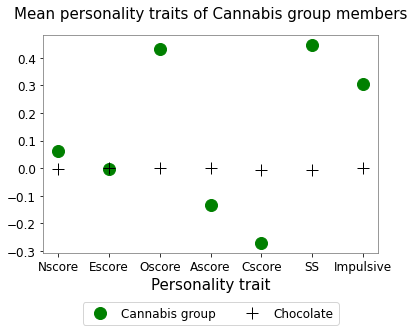

In [419]:
plt.plot(traits, group_mean_scores['can_user_binary'], 'o', color = 'green', markersize = 12, label = 'Cannabis group')
plt.plot(traits, active_user_mean['Choc'], '+', color = 'black', markersize = 12, label = 'Chocolate')
plt.xlabel('Personality trait', fontsize = 15, y = -0.1)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Mean personality traits of Cannabis group members',fontsize = 15, y = 1.05 )
plt.legend(fontsize = 12, bbox_to_anchor=(0.9, -0.2), ncol = 2)

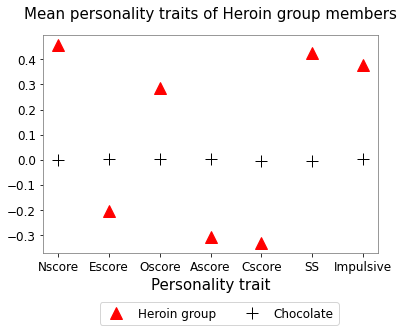

In [420]:
plt.plot(traits, group_mean_scores['heroin_user_binary'], '^', color = 'red', markersize = 12, label = 'Heroin group')
plt.plot(traits, active_user_mean['Choc'], '+', color = 'black', markersize = 12, label = 'Chocolate')
plt.xlabel('Personality trait', fontsize = 15, y = -0.1)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Mean personality traits of Heroin group members',fontsize = 15, y = 1.05 )
plt.legend(fontsize = 12, bbox_to_anchor=(0.9, -0.2), ncol = 2)

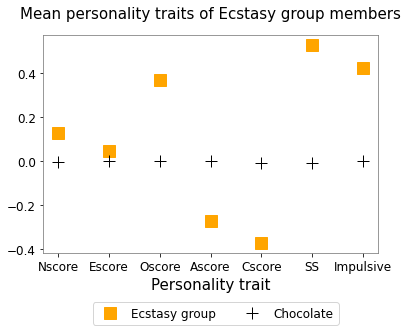

In [418]:
plt.plot(traits, group_mean_scores['ecstasy_user_binary'], 's', color = 'orange', markersize = 12, label = 'Ecstasy group')
plt.plot(traits, active_user_mean['Choc'], '+', color = 'black', markersize = 12, label = 'Chocolate')
plt.xlabel('Personality trait', fontsize = 15, y = -0.1)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Mean personality traits of Ecstasy group members',fontsize = 15, y = 1.05 )
plt.legend(fontsize = 12, bbox_to_anchor=(0.9, -0.2), ncol = 2)

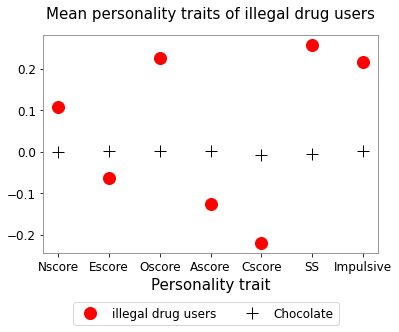

In [416]:
# get a new copy of the data set and safe it inder data_grouping
data_all_drugs = data_mod2.copy()

#we define illegal drug users we want to address as people who have consumed at least one illegal drug in the past week
data_all_drugs.replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],[0,0,0,0,0,1,1], inplace = True )

data_all_drugs['used_illegal_num'] = data_all_drugs[illegal_drugs].sum(axis =1)
data_all_drugs['used_illegal'] = data_all_drugs['used_illegal_num'].apply(lambda x: 1 if x > 0 else 0)

# calculate mean personality scores for illegal drug users
drug_user = data_all_drugs[data_all_drugs['used_illegal'] == 1]
drug_user_p_scores = drug_user[traits].mean()


plt.plot(traits, drug_user_p_scores, 'o', color = 'red', markersize = 12, label = 'illegal drug users')
plt.plot(traits, active_user_mean['Choc'], '+', color = 'black', markersize = 12, label = 'Chocolate')
plt.xlabel('Personality trait', fontsize = 15, y = -0.1)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Mean personality traits of illegal drug users',fontsize = 15, y = 1.05 )
plt.legend(fontsize = 12, bbox_to_anchor=(0.9, -0.2), ncol = 2)


## Do people who use drugs at different intervals have different personality traits?

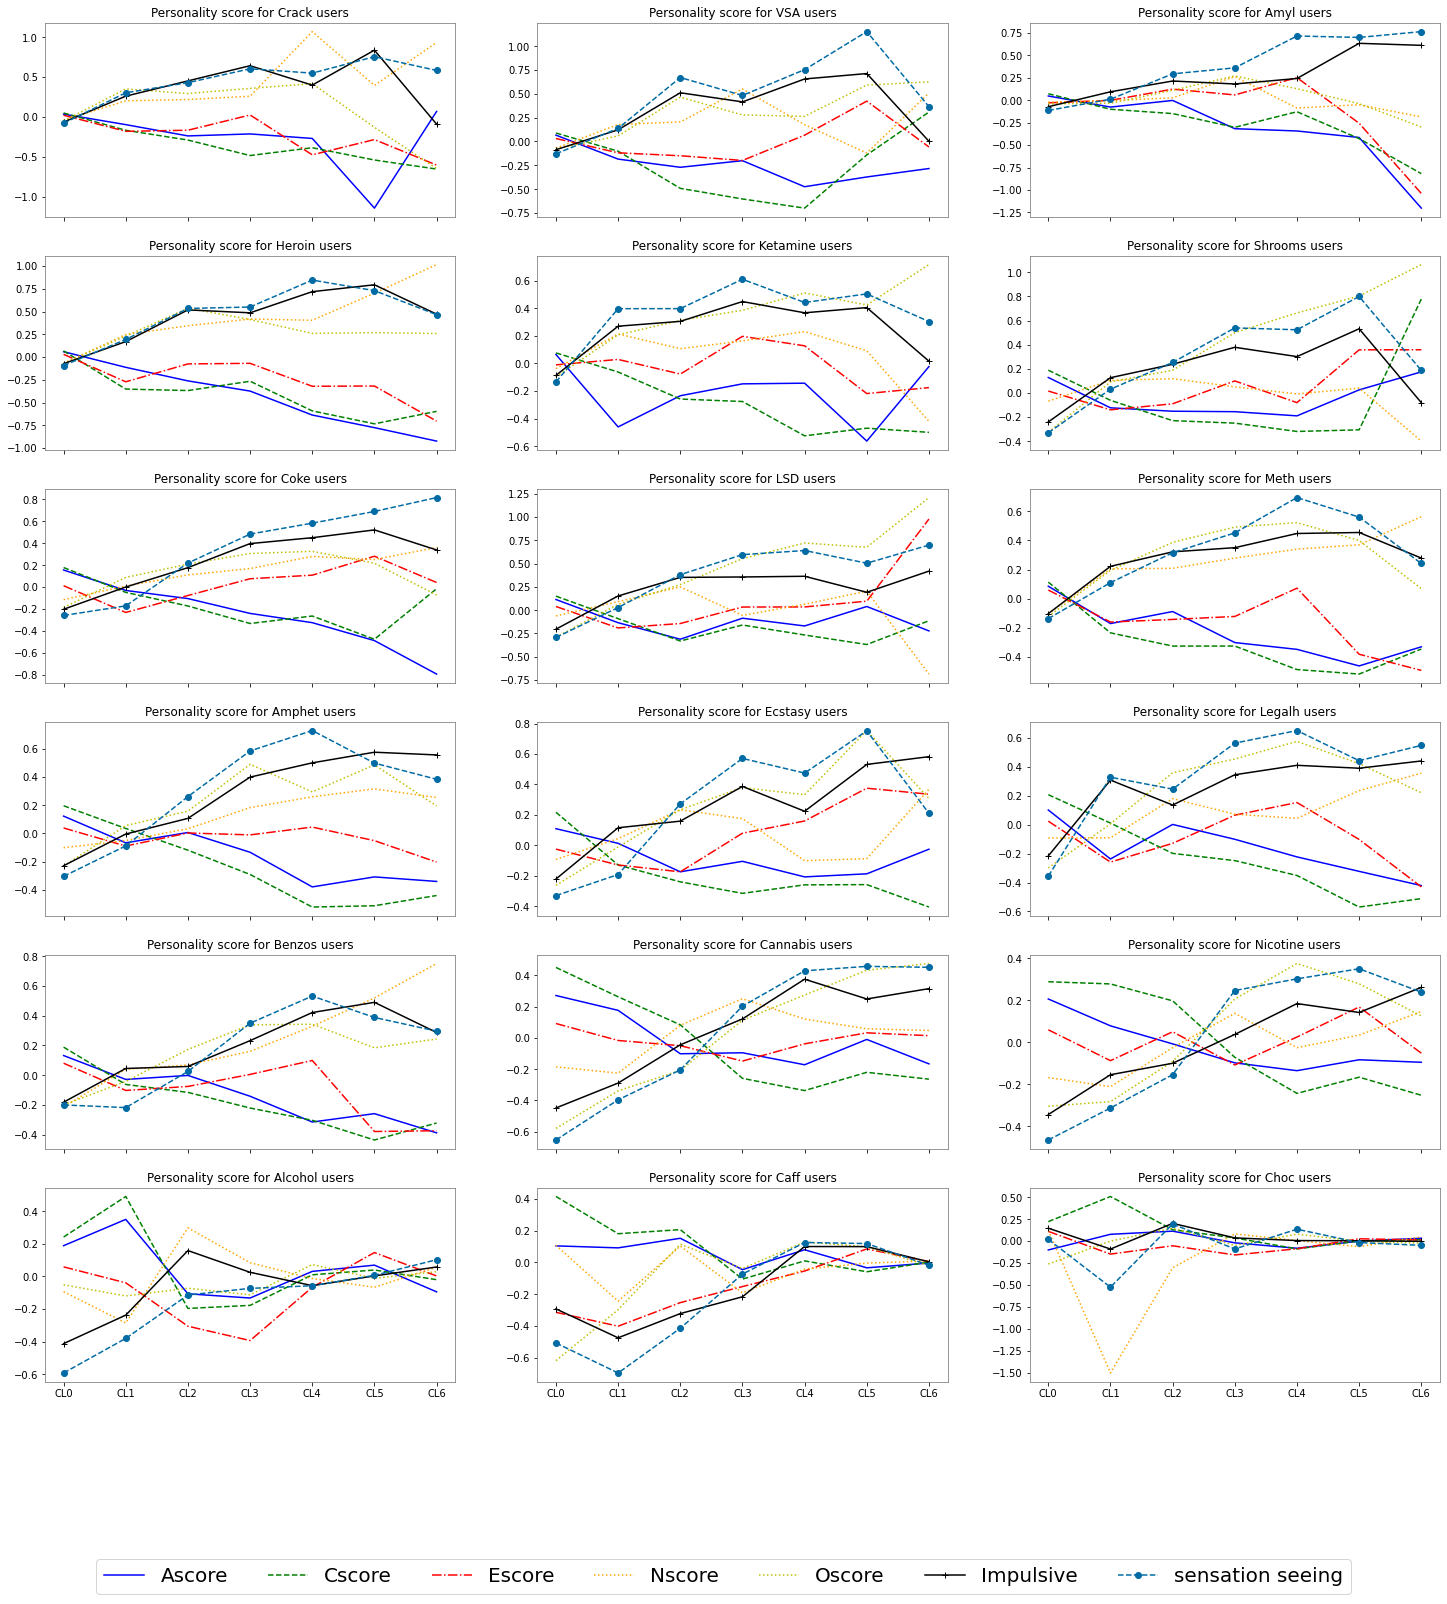

In [56]:
fig = plt.figure()
axs = fig.subplots(6,3, sharex = True)
fig.set_figheight(25)
fig.set_figwidth(25)
j =0
for i, drug in enumerate(active_drug):
    if j % 3 == 0:
        j = 0
    a = pd.pivot_table(data = data_mod, index = drug, aggfunc = 'mean')

    axs[i//3,j].plot(a.index, a.Ascore, 'b-', label = 'Ascore')
    axs[i//3,j].plot(a.index, a.Cscore, 'g--', label = 'Cscore')
    axs[i//3,j].plot(a.index, a.Escore, 'r-.', label = 'Escore')
    axs[i//3,j].plot(a.index, a.Nscore, ':', color = 'orange', label = 'Nscore')
    axs[i//3,j].plot(a.index, a.Oscore, 'y:', label = 'Oscore')
    axs[i//3,j].plot(a.index, a.Impulsive, 'k+-', label = 'Impulsive')
    axs[i//3,j].plot(a.index, a.SS, 'o--', label = 'sensation seeing')
    axs[i//3, j].set_title(f'Personality score for {drug} users')
    #axs[i,j].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #axs[i,j].title(f'Mean scores of Personality traits for "{drug}" users')
    j += 1

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    
fig.legend(lines[:7], labels[:7], loc = 'lower center', ncol =7, fontsize = 20)
plt.show()


Text(0.5, 0, 'Personality trait')

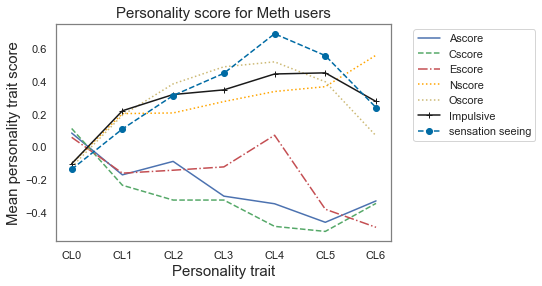

In [1034]:
a = pd.pivot_table(data = data_mod, index = 'Meth', aggfunc = 'mean')


plt.plot(a.index, a.Ascore, 'b-', label = 'Ascore')
plt.plot(a.index, a.Cscore, 'g--', label = 'Cscore')
plt.plot(a.index, a.Escore, 'r-.', label = 'Escore')
plt.plot(a.index, a.Nscore, ':', color = 'orange', label = 'Nscore')
plt.plot(a.index, a.Oscore, 'y:', label = 'Oscore')
plt.plot(a.index, a.Impulsive, 'k+-', label = 'Impulsive')
plt.plot(a.index, a.SS, 'o--', label = 'sensation seeing')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Personality score for Meth users', fontsize = 15)
plt.ylabel('Mean personality trait score', fontsize = 15)
plt.xlabel('Personality trait', fontsize = 15)

* NScore: neuroticism (resilient/confident vs. sensitive/nervous)  
* Escore: extraversion (solitary/reserved vs. outgoing/energetic)  
* Oscore: openeness to experience (consistent/cautious vs. inventive/curious)  
* Ascore: agreeableness (challenging/callous vs. friendly/compassionate)  
* Cscore: conscientiousness (extravagant/careless vs. efficient/organized) 

For most illegald drugs a good rule of same is that the variation from the mean get larger the more often someone consumes drugs. The opposite is observed for Alcohol and nicotine, which are frequently used by many responders. 

<AxesSubplot:>

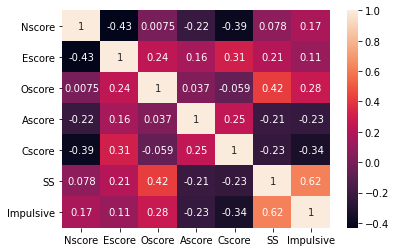

In [57]:
# identify correlations of personality trait scores
corr = data_mod_eth[traits].corr()
sns.heatmap(corr, annot = True)

Sensation seeking and Impulsivity seem to be correlated. One of them can propably be dropped for modelling.

In [58]:
# identify power users who have used almost all drugs
power_user = data_mod[data_mod['Heroin'].isin(user_criterion) & data_mod['Amphet'].isin(user_criterion) & 
                     data_mod['Meth'].isin(user_criterion) & data_mod['Coke'].isin(user_criterion) & 
                     data_mod['LSD'].isin(user_criterion) & data_mod['Ketamine'].isin(user_criterion) & 
                     data_mod['Ecstasy'].isin(user_criterion) & data_mod['Alcohol'].isin(user_criterion) & 
                     data_mod['Nicotine'].isin(user_criterion) & data_mod['Benzos'].isin(user_criterion)] 
power_user.shape

(2, 30)

In [59]:
power_user

Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
ID                                                                        
882  -0.95197  0.48246   -2.43591 -0.57009   -0.31685  0.62967 -0.15487   
1363 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685  0.82562 -1.09207   

       Oscore   Ascore   Cscore  Impulsive       SS Alcohol Amphet Amyl  \
ID                                                                        
882   0.88309 -0.45321 -1.38502    0.19268  1.92173     CL5    CL4  CL0   
1363  0.58331  0.76096 -1.13788    0.88113 -0.52593     CL6    CL6  CL0   

     Benzos Caff Cannabis Choc Coke Crack Ecstasy Heroin Ketamine Legalh  LSD  \
ID                                                                              
882     CL4  CL5      CL6  CL5  CL5   CL0     CL5    CL4      CL4    CL4  CL4   
1363    CL5  CL5      CL4  CL5  CL4   CL0     CL4    CL4      CL5    CL6  CL5   

     Meth Shrooms Nicotine  VSA  
ID                               
882   CL4     CL4      CL5  CL3  
1363  CL5     CL4      CL4  CL0

In [60]:
# find people that have never used most drugs
abstinents = data_mod[data_mod['Heroin'].isin(['CL0'])& data_mod['Alcohol'].isin(['CL0'])& data_mod['Caff'].isin(['CL0'])&
                      data_mod['Nicotine'].isin(['CL0'])]
abstinents.shape

(2, 30)

In [61]:
abstinents

Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
ID                                                                        
389  -0.07854 -0.48246    0.45468  0.96082   -1.10702 -1.32828  0.32197   
1281 -0.95197 -0.48246    0.45468  0.96082   -0.50212  0.82562  0.63779   

       Oscore   Ascore   Cscore  Impulsive       SS Alcohol Amphet Amyl  \
ID                                                                        
389  -0.58331 -1.34289  2.04506   -0.71126  0.07987     CL0    CL0  CL0   
1281 -0.84732 -2.21844  0.93949    1.86203  1.92173     CL0    CL0  CL0   

     Benzos Caff Cannabis Choc Coke Crack Ecstasy Heroin Ketamine Legalh  LSD  \
ID                                                                              
389     CL0  CL0      CL0  CL5  CL0   CL0     CL0    CL0      CL0    CL0  CL0   
1281    CL0  CL0      CL0  CL0  CL0   CL0     CL0    CL0      CL0    CL0  CL0   

     Meth Shrooms Nicotine  VSA  
ID                               
389   CL0     CL0      CL0  CL0  
1281  CL0     CL0      CL0  CL0

# Modeling data

In [1189]:
# import modules
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

We will start with testing some models to predict the alcohol risk. We will group the data into two categories. As alcohol is a legal drug we only consider people who have consumed 'alcohol' on the last day or during the last week:

* Class 0: CL0-CL4
* Class 1: CL5 + CL6

In [202]:
# function to add 
def label_drug(row, drug):
    if row[drug] in ['CL0', 'CL1', 'CL2', 'CL3', 'CL4']:
        return 0
    else:
        return 1
    return 'ERROR'

In [571]:
data_mod['alcohol_user'] = data_mod.apply(lambda row: label_drug(row, 'Alcohol'), axis = 1)


In [1097]:
#test whether 'ERROR' was inserted
data_mod.alcohol_user.unique()

array([1, 0])

In [573]:
# As SS and Impulsive are not independent from each other, I will drop Impulsive
data_modeling = data_mod.copy()
#data_lr = data_lr.drop('Impulsive', axis = 1)
X_alcohol = data_modeling.drop(labels = drugs, axis = 1)
y_alcohol = data_modeling['alcohol_user'].values
X_alcohol.drop(['alcohol_user'], axis = 1, inplace = True)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_alcohol, y_alcohol, test_size = 0.4, random_state = rseed, shuffle = True, 
                                                    stratify = y_lr)
X_alcohol.head(2)

Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
ID                                                                      
1   0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
2  -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   

     Oscore   Ascore   Cscore  Impulsive       SS  is_asian  
ID                                                           
1  -0.58331 -0.91699 -0.00665   -0.21712 -1.18084         0  
2   1.43533  0.76096 -0.14277   -0.71126 -0.21575         0

In [575]:
# compare to dummy classifier that predicts only most frequent class
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')

y_train_dummies = cross_val_predict(dummy_clf, X_train, y_train, cv = 5)
print(metrics.confusion_matrix(y_train,y_train_dummies))
print(metrics.classification_report(y_train,y_train_dummies))

[[  0 370]
 [  0 756]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       370
           1       0.67      1.00      0.80       756

    accuracy                           0.67      1126
   macro avg       0.34      0.50      0.40      1126
weighted avg       0.45      0.67      0.54      1126



/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [1175]:
LogReg_clf = LogisticRegression(random_state=rseed, class_weight = 'balanced')
SGD_clf = SGDClassifier(random_state=rseed, class_weight = 'balanced')
GB_clf = GaussianNB()
knn_clf = KNeighborsClassifier(weights = 'distance')
SVC_clf = SVC(class_weight= 'balanced')
tree_clf = DecisionTreeClassifier(class_weight='balanced')
rfc = RandomForestClassifier(class_weight='balanced')
xgb_clf = xgb.XGBClassifier()
adab_clf = AdaBoostClassifier(random_state=rseed)

clfs = {'LogReg_clf':LogReg_clf,'SGD_clf':SGD_clf, 'GB_clf':GB_clf, 'knn_clf':knn_clf, 'SVC_clf':SVC_clf,
        'tree_clf':tree_clf, 'rfc':rfc, 'adab_clf':adab_clf, 'xgb_clf':xgb_clf }

In [1315]:
#function to test all classifiers

def classifiers(X, y, metric = 'f1_macro', cv = 5, print_class_report = False):
    '''
    Function to test numerous classifiers on training data 
    Uses Corss validation 
    Metrics: 'f1', 'f1_macro', 'f1_weighted', 'recall', 'precission', 'accuracy', 'roc_auc'
    prints classification report of best classifier if requested
    '''
    #calculate priors
    class_count = Counter(y)

    priors = [class_count[i]/len(y) for i in range(len(class_count))]

    LogReg_clf = LogisticRegression(random_state=rseed, class_weight = 'balanced')
    SGD_clf = SGDClassifier(random_state=rseed, class_weight = 'balanced')
    GB_clf = GaussianNB(priors = priors)
    knn_clf = KNeighborsClassifier(weights = 'distance')
    SVC_clf = SVC(class_weight= 'balanced')
    tree_clf = DecisionTreeClassifier(class_weight='balanced')
    rfc = RandomForestClassifier(class_weight='balanced')
    xgb_clf = xgb.XGBClassifier()
    adab_clf = AdaBoostClassifier(random_state=rseed)

    clfs = {'LogReg_clf':LogReg_clf,'SGD_clf':SGD_clf, 'GB_clf':GB_clf, 'knn_clf':knn_clf, 'SVC_clf':SVC_clf,
        'tree_clf':tree_clf, 'rfc':rfc, 'adab_clf':adab_clf, 'xgb_clf':xgb_clf }
    

    
    clf_scores = []

    
    for name, clf  in clfs.items():
        cv_score = cross_val_score(clf, X,y, scoring = metric , cv = cv)
        print(f'For {name} the {metric} cross validation scores are:')
        print([round(score,2) for score in cv_score])
        print(f'The mean score is : {cv_score.mean().round(2)}', '\n')
        #add mean score to list 
        clf_scores.append((name, cv_score.mean(), clf))
    
    if print_class_report:
        clf_scores = sorted(clf_scores, key = lambda x: x[1], reverse = True)
        print('***********')
        print(clf_scores)
        
        y_pred = cross_val_predict(clf_scores[0][2], X,y)
        print('\n',f'Classification report for best classifier ({clf_scores[0][0]})')

        print('\n',metrics.classification_report(y, y_pred))
        
    


In [1322]:
def classifiers_plots(X, y, cv = 5):
    ''' 
    Function to test numerous classifiers on training data and plot output 
    Uses Corss validation 
    Metrics: 'f1', 'f1_macro', 'f1_weighted', 'recall', 'precission', 'accuracy', 'roc_auc'
    '''
    #calculate priors
    class_count = Counter(y)

    priors = [class_count[i]/len(y) for i in range(len(class_count))]
    
    LogReg_clf = LogisticRegression(random_state=rseed, class_weight = 'balanced')
    SGD_clf = SGDClassifier(random_state=rseed, class_weight = 'balanced')
    GB_clf = GaussianNB(priors = priors)
    knn_clf = KNeighborsClassifier(weights = 'distance')
    SVC_clf = SVC(class_weight= 'balanced')
    tree_clf = DecisionTreeClassifier(class_weight='balanced')
    rfc = RandomForestClassifier(class_weight='balanced')
    xgb_clf = xgb.XGBClassifier()
    adab_clf = AdaBoostClassifier(random_state=rseed)

    clfs = {'LogReg_clf':LogReg_clf,'SGD_clf':SGD_clf, 'GB_clf':GB_clf, 'knn_clf':knn_clf, 'SVC_clf':SVC_clf,
        'tree_clf':tree_clf, 'rfc':rfc, 'adab_clf':adab_clf, 'xgb_clf':xgb_clf }

    
    
    clf_recalls = []
    clf_recalls_std = []
    clf_precision = []
    clf_precision_std = []
    clf_names = []
    roc_auc = []
    
    #add true negative rate?
    
    for name, clf  in clfs.items():
        cv_scores = cross_validate(clf, X,y, scoring = ['recall', 'precision', 'f1_macro'] , cv = cv)
        cv_prec = cross_val_score(clf, X,y, scoring = 'precision' , cv = cv)
        clf_recalls.append(cv_scores['test_recall'].mean())
        clf_recalls_std.append(cv_scores['test_recall'].std())
        clf_precision.append(cv_scores['test_precision'].mean())
        clf_precision_std.append(cv_scores['test_precision'].std())
        clf_names.append(name)
    
    
    

    fig, (ax0, ax1) = plt.subplots(ncols = 2, sharey = True)
    ax0.errorbar(clf_names, clf_recalls, yerr=clf_recalls_std,marker = 'o', ls = 'none')
    ax0.set_xticklabels(clf_names, rotation=45, horizontalalignment='right')
    ax0.set_title('recall')
    ax1.errorbar(clf_names, clf_precision, yerr=clf_precision_std,marker = 'x', ls = 'none')
    ax1.set_xticklabels(clf_names, rotation=45, horizontalalignment='right')
    ax1.set_title('precision')

    

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning:

FixedFormatter should only be used together with FixedLocator



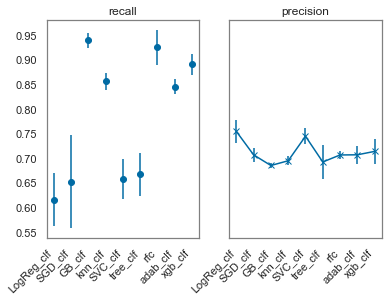

In [1323]:
classifiers_plots(X_train, y_train)


In [1319]:
classifiers(X_train, y_train,metric = 'f1_macro', print_class_report=True)

For LogReg_clf the f1 cross validation scores are:
[0.64, 0.72, 0.65, 0.73, 0.64]
The mean score is : 0.68 

For SGD_clf the f1 cross validation scores are:
[0.69, 0.58, 0.66, 0.75, 0.69]
The mean score is : 0.67 

For GB_clf the f1 cross validation scores are:
[0.78, 0.81, 0.8, 0.79, 0.79]
The mean score is : 0.79 

For knn_clf the f1 cross validation scores are:
[0.76, 0.76, 0.79, 0.77, 0.76]
The mean score is : 0.77 

For SVC_clf the f1 cross validation scores are:
[0.68, 0.68, 0.69, 0.75, 0.69]
The mean score is : 0.7 

For tree_clf the f1 cross validation scores are:
[0.67, 0.7, 0.74, 0.7, 0.62]
The mean score is : 0.69 

For rfc the f1 cross validation scores are:
[0.77, 0.79, 0.8, 0.81, 0.77]
The mean score is : 0.79 

For adab_clf the f1 cross validation scores are:
[0.75, 0.79, 0.76, 0.79, 0.76]
The mean score is : 0.77 

For xgb_clf the f1 cross validation scores are:
[0.75, 0.8, 0.79, 0.8, 0.81]
The mean score is : 0.79 

***********
[('xgb_clf', 0.7919785205226912, XGBClass

All models are  better than a dummy classifier but the F1 scors are smaller than 0.6 for the best algorithms. This is propably due to inbalance of the labels.

In [1166]:
class_count = sorted(Counter(y_train).items())

priors = [class_count[i][1]/len(y_train) for i in range(len(class_count))]
priors

[0.3285968028419183, 0.6714031971580817]

In [1165]:
sorted(Counter(y_train).items())

[(0, 370), (1, 756)]

In [ ]:
# try hyperparameter tuning

### Stacking

In [1048]:
from sklearn.ensemble import StackingClassifier

In [1050]:
estimators = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000)),
    ('svc', SVC()),
     ('rfc',RandomForestClassifier(class_weight='balanced')),
     ('tree', DecisionTreeClassifier(class_weight='balanced')),
     ('knn', KNeighborsClassifier(weights='distance'))
]
clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
y_pred = cross_val_predict(clf, X_train, y_train, cv = 5)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

[[ 63 307]
 [ 44 712]]
              precision    recall  f1-score   support

           0       0.59      0.17      0.26       370
           1       0.70      0.94      0.80       756

    accuracy                           0.69      1126
   macro avg       0.64      0.56      0.53      1126
weighted avg       0.66      0.69      0.63      1126



## Use Oversampling to account for class inbalance

Class 0 represents 32.82%, class 1 represents 67.18%.


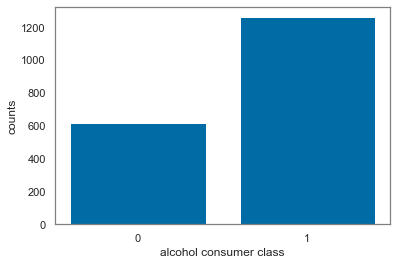

In [1052]:
# plot class imbalance
#class labels
x = data_mod.alcohol_user.value_counts().sort_index().index
#counts for differenct classes
height = data_mod.alcohol_user.value_counts().sort_index().values
plt.bar(x, height)
plt.xlabel('alcohol consumer class')
plt.ylabel('counts')
plt.xticks(ticks = [0,1])
print(f'Class 0 represents {round(height[0]/len(data_mod)*100,2)}%, class 1 represents {round(height[1]/len(data_mod)*100,2)}%.')

In [1053]:
# use oversampling with SMOTE to generate more instances of underrepresenteted class
# https://github.com/scikit-learn-contrib/imbalanced-learn

from imblearn.over_sampling import  SMOTE
from imblearn.under_sampling import RandomUnderSampler

#initate SMOTE class, resample all classes but the majority class, using 5 nearest neighbors for construction
sm = SMOTE(sampling_strategy='not majority', k_neighbors=5, random_state = rseed)

X_res, y_res = sm.fit_resample(X_train, y_train)
print(f'Resampled dataset contains the following number of instances per class: {Counter(y_res)}')


Resampled dataset contains the following number of instances per class: Counter({0: 756, 1: 756})


In [1054]:
# train test split for ressampled data


In [1055]:
# compare to dummy classifier

dummy_clf = DummyClassifier(strategy = 'stratified')
y_train_dummies = cross_val_predict(dummy_clf, X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_dummies))
print(metrics.classification_report(y_res,y_train_dummies))

[[360 396]
 [392 364]]
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       756
           1       0.48      0.48      0.48       756

    accuracy                           0.48      1512
   macro avg       0.48      0.48      0.48      1512
weighted avg       0.48      0.48      0.48      1512



These are the base statistics for a "stupid", inaccurate model. Anything that is better than that should be "workable".

In [1056]:
# KNN model with resampled data
knn = KNeighborsClassifier()
y_train_pred_res = cross_val_predict(knn,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[621 135]
 [311 445]]
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       756
           1       0.77      0.59      0.67       756

    accuracy                           0.71      1512
   macro avg       0.72      0.71      0.70      1512
weighted avg       0.72      0.71      0.70      1512



In [1057]:
knn = KNeighborsClassifier( weights = 'distance')
y_train_pred_res = cross_val_predict(knn,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[681  75]
 [312 444]]
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       756
           1       0.86      0.59      0.70       756

    accuracy                           0.74      1512
   macro avg       0.77      0.74      0.74      1512
weighted avg       0.77      0.74      0.74      1512



That looks a bit better but now the recall for class 2 is far from great.

In [1058]:
#Log regression with resampled data
y_train_pred_res = cross_val_predict(LogReg_clf,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[457 299]
 [302 454]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       756
           1       0.60      0.60      0.60       756

    accuracy                           0.60      1512
   macro avg       0.60      0.60      0.60      1512
weighted avg       0.60      0.60      0.60      1512



In [1059]:
# SGD with resampled data
y_train_pred_res = cross_val_predict(SGD_clf,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[386 370]
 [284 472]]
              precision    recall  f1-score   support

           0       0.58      0.51      0.54       756
           1       0.56      0.62      0.59       756

    accuracy                           0.57      1512
   macro avg       0.57      0.57      0.57      1512
weighted avg       0.57      0.57      0.57      1512



In [1060]:
# Naive Bayes with resampled data

y_train_pred_res = cross_val_predict(GB_clf,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[ 91 665]
 [ 45 711]]
              precision    recall  f1-score   support

           0       0.67      0.12      0.20       756
           1       0.52      0.94      0.67       756

    accuracy                           0.53      1512
   macro avg       0.59      0.53      0.44      1512
weighted avg       0.59      0.53      0.44      1512



In [1061]:
# test decission tree on resampled data
y_train_pred_res = cross_val_predict(tree_clf,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[529 227]
 [263 493]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       756
           1       0.68      0.65      0.67       756

    accuracy                           0.68      1512
   macro avg       0.68      0.68      0.68      1512
weighted avg       0.68      0.68      0.68      1512



In [1062]:
# test resampled data with random forest classifier
y_train_pred_res = cross_val_predict(rfc,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[577 179]
 [147 609]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       756
           1       0.77      0.81      0.79       756

    accuracy                           0.78      1512
   macro avg       0.78      0.78      0.78      1512
weighted avg       0.78      0.78      0.78      1512



In [1063]:
# SVM classifier for resampled data
y_train_pred_res = cross_val_predict(SVC_clf,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[517 239]
 [240 516]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       756
           1       0.68      0.68      0.68       756

    accuracy                           0.68      1512
   macro avg       0.68      0.68      0.68      1512
weighted avg       0.68      0.68      0.68      1512



In [1064]:
# Classification with Adaboost
from sklearn.ensemble import AdaBoostClassifier
adab_clf = AdaBoostClassifier(random_state=rseed)
y_pred = cross_val_predict(adab_clf,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[517 239]
 [240 516]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       756
           1       0.68      0.68      0.68       756

    accuracy                           0.68      1512
   macro avg       0.68      0.68      0.68      1512
weighted avg       0.68      0.68      0.68      1512



In [1065]:
# Classification with Adaboost using Log regression as base estimator
from sklearn.ensemble import AdaBoostClassifier

adab_clf_log = AdaBoostClassifier(base_estimator= LogisticRegression(), random_state=rseed)
y_pred = cross_val_predict(adab_clf_log,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[517 239]
 [240 516]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       756
           1       0.68      0.68      0.68       756

    accuracy                           0.68      1512
   macro avg       0.68      0.68      0.68      1512
weighted avg       0.68      0.68      0.68      1512



In [1066]:
# Classification with XGBoost
import xgboost as xgb
#initiate model
xgb_clf = xgb.XGBClassifier()
y_pred = cross_val_predict(xgb_clf,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[517 239]
 [240 516]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       756
           1       0.68      0.68      0.68       756

    accuracy                           0.68      1512
   macro avg       0.68      0.68      0.68      1512
weighted avg       0.68      0.68      0.68      1512



Performance of classifiers on oversampled data is better than on original dataset

### Try random forrest and XGBoost with viewer variables

In [1067]:
# use only personality traits and age for classification
data_cut = data_lr.copy()
data_cut.drop(['Country', 'Ethnicity', 'Gender'], axis = 1, inplace = True)
data_cut.head(1)

Age  Education   Nscore   Escore   Oscore   Ascore   Cscore  \
ID                                                                    
1   0.49788   -0.05921  0.31287 -0.57545 -0.58331 -0.91699 -0.00665   

    Impulsive       SS Alcohol Amphet Amyl Benzos Caff Cannabis Choc Coke  \
ID                                                                          
1    -0.21712 -1.18084     CL5    CL2  CL0    CL2  CL6      CL0  CL5  CL0   

   Crack Ecstasy Heroin Ketamine Legalh  LSD Meth Shrooms Nicotine  VSA  \
ID                                                                        
1    CL0     CL0    CL0      CL0    CL0  CL0  CL0     CL0      CL2  CL0   

    alcohol_user  
ID                
1              1

In [1068]:
# split into X and y and train, test split
X2 = data_cut.iloc[:,:7].values
y2 = data_cut.alcohol_user.values

# train, test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2 )

# Oversampling
X2_res, y2_res = sm.fit_resample(X_train2, y_train2)

In [1069]:
# test random forest classifier on resampled data containing only personality traits
y_train_pred_res = cross_val_predict(rfc,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[576 180]
 [146 610]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       756
           1       0.77      0.81      0.79       756

    accuracy                           0.78      1512
   macro avg       0.78      0.78      0.78      1512
weighted avg       0.78      0.78      0.78      1512



This model is almost as good as with all features. We will still continue with all features.

In [1070]:
y_pred = cross_val_predict(xgb_clf,X_res, y_res, cv = 5)
print(metrics.confusion_matrix(y_res,y_train_pred_res))
print(metrics.classification_report(y_res,y_train_pred_res))

[[576 180]
 [146 610]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       756
           1       0.77      0.81      0.79       756

    accuracy                           0.78      1512
   macro avg       0.78      0.78      0.78      1512
weighted avg       0.78      0.78      0.78      1512



Still performs ok, but we will continue with random forrest classifier.

## Hyperparameter tuning of random forrest classifier

In [1075]:
X_train_res.shape
y_train_res.shape

(1134,)

In [1076]:
params = {'n_estimators':[50,100,200,500, 750, 1000,1250, 1500, 1750, 2000, 2500],
          'criterion' : ['gini', 'entropy'],
          'max_depth': [2,3,4,5,6,7,8,9,10, 15, 20],
          'min_samples_split' : [2,4,6,8,10],
          'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
          'max_features' : ['sqrt', 'log2']
          }

# use macro average of recall as scoring metrics

scorer = metrics.make_scorer(metrics.f1_score, average = 'macro')

grid_rand_for = RandomizedSearchCV(RandomForestClassifier(), param_distributions = params, n_jobs = -1, 
                                   cv = 5, verbose = 5, n_iter = 50)#, scoring=scorer)
grid_rand_for.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [50, 100, 200, 500, 750,
                                                         1000, 1250, 1500, 1750,
                                                         2000, 2500]},
                   verbose=5)

In [341]:
# print best score and best parameters
#standard scoring method
print(grid_rand_for.best_score_)
print(grid_rand_for.best_params_)

0.7803789325952205
{'n_estimators': 750, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}


In [342]:
# print best score and best parameters
# macro avg f1_score
print(grid_rand_for.best_score_)
print(grid_rand_for.best_params_)

0.7803789325952205
{'n_estimators': 750, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}


In [343]:
# save best parameters
best_params = grid_rand_for.best_estimator_
# predict y_values for X_test
y_predict_test = best_params.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predict_test))
print(metrics.classification_report(y_test,y_predict_test))

[[ 80 166]
 [ 88 417]]
              precision    recall  f1-score   support

           0       0.48      0.33      0.39       246
           1       0.72      0.83      0.77       505

    accuracy                           0.66       751
   macro avg       0.60      0.58      0.58       751
weighted avg       0.64      0.66      0.64       751



In [1081]:
# test model on training data
y_predict_train = best_params.predict(X_train)
print(metrics.confusion_matrix(y_train,y_predict_train))
print(metrics.classification_report(y_train,y_predict_train))

[[370   0]
 [  0 756]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       756

    accuracy                           1.00      1126
   macro avg       1.00      1.00      1.00      1126
weighted avg       1.00      1.00      1.00      1126



The model performs much better on training data than on test data. The scores obtained from cross_val_predict are also much better than the scores obtained from predicting the test set. More model tuning is requierd and more data needs to be collected.

## Modeling of Heroin addiction

In [1292]:
data_mod.head(5)

Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
ID                                                                      
1   0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
2  -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
3   0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
4  -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
5   0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

     Oscore   Ascore   Cscore  Impulsive       SS Alcohol Amphet Amyl Benzos  \
ID                                                                             
1  -0.58331 -0.91699 -0.00665   -0.21712 -1.18084     CL5    CL2  CL0    CL2   
2   1.43533  0.76096 -0.14277   -0.71126 -0.21575     CL5    CL2  CL2    CL0   
3  -0.84732 -1.62090 -1.01450   -1.37983  0.40148     CL6    CL0  CL0    CL0   
4  -0.01928  0.59042  0.58489   -1.37983 -1.18084     CL4    CL0  CL0    CL3   
5  -0.45174 -0.30172  1.30612   -0.21712 -0.21575     CL4    CL1  CL1    CL0   

   Caff Cannabis Choc Coke Crack Ecstasy Heroin Ketamine Legalh  LSD Meth  \
ID                                                                          
1   CL6      CL0  CL5  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   
2   CL6      CL4  CL6  CL3   CL0     CL4    CL0      CL2    CL0  CL2  CL3   
3   CL6      CL3  CL4  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   
4   CL5      CL2  CL4  CL2   CL0     CL0    CL0      CL2    CL0  CL0  CL0   
5   CL6      CL3  CL6  CL0   CL0     CL1    CL0      CL0    CL1  CL0  CL0   

   Shrooms Nicotine Semer  VSA  alcohol_user  
ID                                            
1      CL0      CL2   CL0  CL0             2  
2      CL0      CL4   CL0  CL0             2  
3      CL1      CL0   CL0  CL0             2  
4      CL0      CL2   CL0  CL0             1  
5      CL2      CL2   CL0  CL0             1

Define heroin users. As Heroin consumption even once a month is a bigger problem than alcohol consumption, the definition of active user will be broader than for alcohol. 
* class 0: non_user : CL0, CL1, CL2, CL3
* class 1:  active_user: CL4, CL5, CL6

Counter({0: 1824, 1: 53})

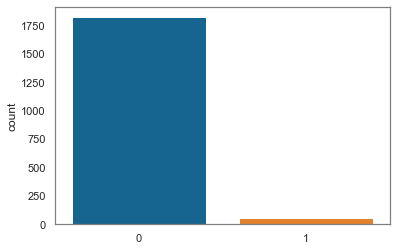

In [1077]:
# what if we have only two classes?
y_heroin = data_mod['Heroin'].copy()
X_heroin = data_mod.iloc[:,:12]
y_heroin.replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], [0,0,0,0,1,1,1], inplace = True)
y_heroin = y_heroin.values
sns.countplot(y_heroin)
Counter(y_heroin)

In [1078]:
# innitiate and store classifiers

heroin_class_count = Counter(y_heroin)
heroin_priors = [heroin_class_count[i]/len(y_heroin) for i in range(len(heroin_class_count))]
GB_clf_h = GaussianNB(priors = heroin_priors )
dumm_clf = DummyClassifier(strategy = 'most_frequent')

classifiers = [(dummy_clf,'dummy_clf'), (LogReg_clf,'LogReg_clf'), (SGD_clf,'SGD_clf'), (GB_clf_h,'GB_clf_h'),
               (knn_clf,'knn_clf'), (SVC_clf,'SVC_clf'), (tree_clf,'tree_clf'), (rfc,'rfc'), (adab_clf,'adab_clf'), 
               (adab_clf_log,'adab_clf_log'), (xgb_clf,'xgb_clf') ]

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_heroin, y_heroin, test_size = 0.4, stratify = y_heroin,
                                                           shuffle = True, random_state = rseed)
# loop through all classifiers and calculate f1 score
for classifier,name in classifiers:
    y_pred_h = cross_val_predict(classifier, X_train_h, y_train_h, cv=5)
    f1score = metrics.f1_score(y_train_h, y_pred_h, average = 'macro')
    print(f'F1 score for classifier {name :15}: {round(f1score, 3)}')
print("\n")  
# loop through all classifiers and calculate recallscore
for classifier,name in classifiers:
    y_pred_h = cross_val_predict(classifier, X_train_h, y_train_h, cv=5)
    recall = metrics.recall_score(y_train_h, y_pred_h, average = 'macro')
    print(f'Recall score for classifier {name :15}: {round(recall, 3)}')

F1 score for classifier dummy_clf      : 0.485


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



F1 score for classifier LogReg_clf     : 0.524
F1 score for classifier SGD_clf        : 0.52
F1 score for classifier GB_clf_h       : 0.558
F1 score for classifier knn_clf        : 0.493
F1 score for classifier SVC_clf        : 0.55
F1 score for classifier tree_clf       : 0.586
F1 score for classifier rfc            : 0.493
F1 score for classifier adab_clf       : 0.598
F1 score for classifier adab_clf_log   : 0.54
F1 score for classifier xgb_clf        : 0.492


Recall score for classifier dummy_clf      : 0.484
Recall score for classifier LogReg_clf     : 0.745
Recall score for classifier SGD_clf        : 0.78


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Recall score for classifier GB_clf_h       : 0.668
Recall score for classifier knn_clf        : 0.5
Recall score for classifier SVC_clf        : 0.639
Recall score for classifier tree_clf       : 0.58
Recall score for classifier rfc            : 0.5
Recall score for classifier adab_clf       : 0.574
Recall score for classifier adab_clf_log   : 0.528
Recall score for classifier xgb_clf        : 0.499


This looks bad, lets try oversampling.

### Oversampling for Heroion classification

In [1082]:
sm = SMOTE(sampling_strategy='not majority', k_neighbors=5, random_state = rseed)

X_res_h, y_res_h = sm.fit_resample(X_train_h, y_train_h)


In [1083]:
# create a dummy classifier as a baseline model
# dummy will uniformly predict one of two classes at random
dummy_clf_h2 = DummyClassifier(strategy='uniform')
y_train_dummies = cross_val_predict(dummy_clf_h2, X_res_h, y_res_h, cv = 5)
print(metrics.confusion_matrix(y_res_h,y_train_dummies))
print(metrics.classification_report(y_res_h,y_train_dummies))

[[571 523]
 [556 538]]
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1094
           1       0.51      0.49      0.50      1094

    accuracy                           0.51      2188
   macro avg       0.51      0.51      0.51      2188
weighted avg       0.51      0.51      0.51      2188



In [1084]:
xgb_clf = xgb.XGBClassifier()

classifiers = [(dummy_clf_h2,'dummy_clf'), (LogReg_clf,'LogReg_clf'), (SGD_clf,'SGD_clf'),
               (knn_clf,'knn_clf'), (SVC_clf,'SVC_clf'), (tree_clf,'tree_clf'), (rfc,'rfc'), (adab_clf,'adab_clf'), 
               (adab_clf_log,'adab_clf_log'), (xgb_clf,'xgb_clf') ]

# print recall for all classifiers
for classifier,name in classifiers:
    y_pred = cross_val_predict(classifier, X_res_h, y_res_h, cv=5)
    recall = metrics.recall_score(y_res_h, y_pred, average = 'macro')
    print(f'Recall score for classifier {name :15}: {round(recall, 3)}')
print('\n')
for classifier,name in classifiers:
    y_pred = cross_val_predict(classifier, X_res_h, y_res_h, cv=5)
    f1 = metrics.f1_score(y_res_h, y_pred, average = 'macro')
    print(f'F1 score for classifier {name :15}: {round(f1, 3)}')
    


Recall score for classifier dummy_clf      : 0.502
Recall score for classifier LogReg_clf     : 0.879
Recall score for classifier SGD_clf        : 0.825
Recall score for classifier knn_clf        : 0.917
Recall score for classifier SVC_clf        : 0.95
Recall score for classifier tree_clf       : 0.96
Recall score for classifier rfc            : 0.982
Recall score for classifier adab_clf       : 0.959
Recall score for classifier adab_clf_log   : 0.868
Recall score for classifier xgb_clf        : 0.972


F1 score for classifier dummy_clf      : 0.509
F1 score for classifier LogReg_clf     : 0.879
F1 score for classifier SGD_clf        : 0.825
F1 score for classifier knn_clf        : 0.917
F1 score for classifier SVC_clf        : 0.95
F1 score for classifier tree_clf       : 0.956
F1 score for classifier rfc            : 0.982
F1 score for classifier adab_clf       : 0.959
F1 score for classifier adab_clf_log   : 0.868
F1 score for classifier xgb_clf        : 0.972


When working with the oversampled data set, most classifiers perform better than the dummy classifier and better than on the original dataset. 

In [1085]:
y_pred_h = cross_val_predict(xgb_clf, X_res_h, y_res_h, cv=5)
print(metrics.confusion_matrix(y_res_h, y_pred_h,))
print(metrics.classification_report(y_res_h, y_pred_h))

[[1047   47]
 [  15 1079]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1094
           1       0.96      0.99      0.97      1094

    accuracy                           0.97      2188
   macro avg       0.97      0.97      0.97      2188
weighted avg       0.97      0.97      0.97      2188



In [1086]:
xgb_clf.fit(X_res_h,y_res_h)
y_pred = xgb_clf.predict(X_test_h)
print(metrics.confusion_matrix(y_test_h, y_pred,))
print(metrics.classification_report(y_test_h, y_pred))

[[709  21]
 [ 20   1]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       730
           1       0.05      0.05      0.05        21

    accuracy                           0.95       751
   macro avg       0.51      0.51      0.51       751
weighted avg       0.95      0.95      0.95       751



The model performs really bad in test data! Is it overfited?

In [1089]:
# what if we add crack consume as a feature to the original data (no oversampling)
data_her = data_mod.copy()
data_her['Gender'] = data_her['Gender'].apply(lambda x: 1 if x >0 else 0)
data_her = pd.get_dummies(data_her,columns = ['Country', 'Ethnicity'], drop_first=True )

y_her = data_her['Heroin']
y_her = y_her.apply(lambda x: int(x.split('L')[-1]))
y_her = y_her.apply(lambda x: 1 if x > 3 else 0)
X_her = data_her.drop([drug for drug in drugs if drug not in ['Crack']], axis = 1)
X_her.drop('alcohol_user', axis = 1, inplace = True)
X_her['Crack'] = X_her['Crack'].apply(lambda x: int(x.split('L')[-1])).apply(lambda x: 1 if x > 1 else 0)

X_her_train, X_her_test, y_her_train, y_her_test  = train_test_split(X_her, y_her, test_size = 0.5, 
                                                                     random_state = rseed, stratify = y_her)

## write a function for this!!
her_count = Counter(y_her)
her_priors = [her_count[i]/len(y_her) for i in range(len(her_count))]
GB_clf_h = GaussianNB(priors = her_priors )
dumm_clf = DummyClassifier(strategy = 'most_frequent')
lr = LogisticRegression(class_weight = 'balanced')


classifiers = [(dummy_clf,'dummy_clf'), (lr,'LogReg_clf'), (SGD_clf,'SGD_clf'), (GB_clf_h,'GB_clf_h'),
               (knn_clf,'knn_clf'), (SVC_clf,'SVC_clf'), (tree_clf,'tree_clf'), (rfc,'rfc'), (adab_clf,'adab_clf'), 
               (adab_clf_log,'adab_clf_log'), (xgb_clf,'xgb_clf') ]



for classifier,name in classifiers:
    y_pred = cross_val_predict(classifier, X_her_train, y_her_train, cv=5)
    recall = metrics.recall_score(y_her_train, y_pred)
    print(f'Recall score for classifier {name :15}: {round(recall, 3)}')
print()
for classifier,name in classifiers:
    y_pred = cross_val_predict(classifier, X_her_train, y_her_train, cv=5)
    f1 = metrics.f1_score(y_her_train, y_pred, average = 'macro')
    print(f'F1 score for classifier {name :15}: {round(f1, 3)}')

Recall score for classifier dummy_clf      : 0.0
Recall score for classifier LogReg_clf     : 0.846
Recall score for classifier SGD_clf        : 0.654
Recall score for classifier GB_clf_h       : 0.923
Recall score for classifier knn_clf        : 0.0
Recall score for classifier SVC_clf        : 0.423
Recall score for classifier tree_clf       : 0.269
Recall score for classifier rfc            : 0.0
Recall score for classifier adab_clf       : 0.115
Recall score for classifier adab_clf_log   : 0.115
Recall score for classifier xgb_clf        : 0.154

F1 score for classifier dummy_clf      : 0.485
F1 score for classifier LogReg_clf     : 0.615
F1 score for classifier SGD_clf        : 0.573
F1 score for classifier GB_clf_h       : 0.095
F1 score for classifier knn_clf        : 0.493
F1 score for classifier SVC_clf        : 0.628
F1 score for classifier tree_clf       : 0.61
F1 score for classifier rfc            : 0.529
F1 score for classifier adab_clf       : 0.562
F1 score for classifie

In [1090]:
LogisticRegression()
params = {'max_iter': [100,200,500],
        'class_weight': ['balanced', {0:1, 1:10}, {0:1, 1:100}, {0:1, 1:1000},{0:0.1, 1:1}, {0:0.01, 1:1},
                             {0:0.001, 1:1}, {0:0.01, 1:10}, {0:0.01, 1:100}]}
scorer = metrics.make_scorer(metrics.f1_score,average = 'macro')
grid_search_cv = GridSearchCV(LogisticRegression(), param_grid=params, cv = 5, n_jobs=-1, scoring = scorer)
grid_search_cv.fit(X_her_train, y_her_train)
print(grid_search_cv.best_score_)
best_param = grid_search_cv.best_estimator_
y_pred = best_param.predict(X_her_test)
print(metrics.confusion_matrix(y_her_test, y_pred))
print(metrics.classification_report(y_her_test, y_pred))

0.6441384878082174
[[864  48]
 [ 14  13]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       912
           1       0.21      0.48      0.30        27

    accuracy                           0.93       939
   macro avg       0.60      0.71      0.63       939
weighted avg       0.96      0.93      0.95       939



Still a lot of false positives!

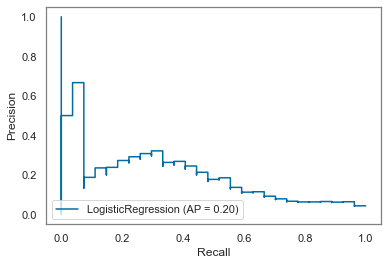

In [1091]:
# plot precision recall curve
disp = metrics.plot_precision_recall_curve(best_param, X_her_test, y_her_test)

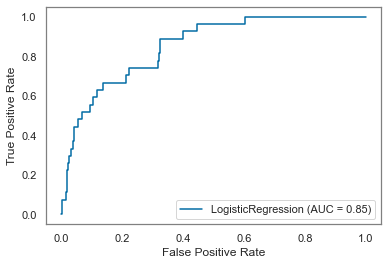

In [1092]:
disp = metrics.plot_roc_curve(clf, X_her_test, y_her_test)

In [1093]:
#try with over and underfitting
model = LogisticRegression(class_weight='balanced', max_iter = 1000)
over = SMOTE(sampling_strategy = 0.1, k_neighbors = 2)
X_h, y_h = over.fit_resample(X_her_train, y_her_train)
under = RandomUnderSampler(sampling_strategy = 0.99)
X_h, y_h = under.fit_resample(X_h, y_h)

model.fit(X_h, y_h)
y_predict = model.predict(X_her_test)
print(metrics.confusion_matrix(y_her_test, y_predict))
print(metrics.classification_report(y_her_test, y_predict))

[[789 123]
 [ 13  14]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       912
           1       0.10      0.52      0.17        27

    accuracy                           0.86       939
   macro avg       0.54      0.69      0.55       939
weighted avg       0.96      0.86      0.90       939



In [ ]:
# add clustering of drugs (Heroine, Crack, Meth), illegal drug user, ecstasy group
#  feature reduction